# Individual Assignment 2 #

## Dataset Description ##

The diabetes dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) which is part of the United States National Institutes of Health. It contains data on 768 female patients who are at least 21 years old and of Pima Indian heritage. It records nine health related variables: 

(1) Pregnancies: how many pregnancies an individual has had as a non-negative integer

(2) Glucose: glucose level in the blood (mmol/L) recorded as a non-negative integer

(3) BloodPressure: blood pressure (mmHg) recorded as a non-negative integer

(4) SkinThickness: thickness of skin (mm) recorded as a non-negative integer

(5) Insulin: insulin level (mIU/L) in the blood as a non-negative integer

(6) BMI: body mass index (kg/$m^2$) as a continuous positive number

(7) DiabetesPedigreeFunction: diabetes percentage, the probability of developing diabetes based on family history 

(8) Age: age in years recorded as a non-negative integer (greater than 21 for all participants)

(9) Outcome: whether a patient has diabetes recorded as a binary variables (1 = yes and 0 = no).

## Question ##

Question: How does the incidence of diabetes change with age and how do other health variables interact with age to influence diabetes incidence?
- variable of interest: Outcome (whether a patient has diabetes)
- explanatory variables: age and other potentially significant variables (selected during EDA)

The dataset contains information on a variety of health-related variables including age and whether a patient has diabetes. This provides the necessary information to ask and answer our question as there is information on age, diabetes incidence, and other health variables related to diabetes. This question is focused mainly on inference as we are trying to understand relationships between the explanatory variables and the response variable.

## Exploratory Data Analysis ##

In [2]:
# imports
library(tidyverse)
library(GGally)
library(repr)
library(broom)
library(leaps)
library(infer)
library(cowplot)
library(broom)
library(car)
library(DHARMa)
library(stats)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Warning message:
“package ‘DHARMa’ was built under R version 4.3.3”
This is DHARMa 0.4.7. For over

In [3]:
# read in the data
diabetes_data <- read.csv('data/diabetes.csv')
head(diabetes_data, 6)
# the data is in tidy format already

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

In [4]:
# summarize the number of observations, variables, and their types
str(diabetes_data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [5]:
summary(diabetes_data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [6]:
# check for null values
colSums(is.na(diabetes_data))
# there are no null values

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [7]:
# look for any duplicated rows
sum(duplicated(diabetes_data))
# there are none
# the data looks clean

[1] 0

In [8]:
# record the class values for each of has diabetes (1) and does not have diabetes (0)
table(diabetes_data$Outcome) # there is class imbalance


  0   1 
500 268 

In [9]:
# see whether the age distribution is different for with and without diabetes
age_summary <- diabetes_data %>%
  group_by(Outcome) %>%
  summarize(mean_age = mean(Age), max_age = max(Age))

age_summary

Outcome mean_age max_age
1 0       31.19000 81     
2 1       37.06716 70

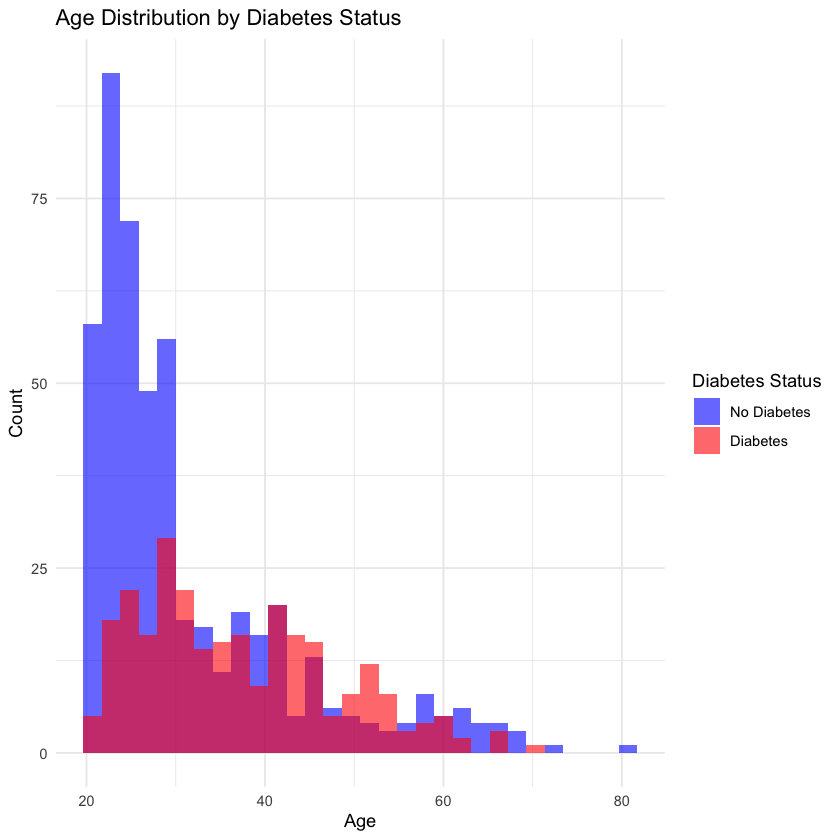

In [10]:
ggplot(diabetes_data, aes(x = Age, fill = as.factor(Outcome))) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 30) +
  labs(title = "Age Distribution by Diabetes Status",
       x = "Age",
       y = "Count",
       fill = "Diabetes Status") +
  scale_fill_manual(values = c("0" = "blue", "1" = "red"), labels = c("No Diabetes", "Diabetes")) +
  theme_minimal()

Based on the above EDA we can see that there is class imbalance in the data (there are more people without diabetes) and we may have to consider this when building the model. Additionally, the main explanatory variable of interest (age) has a different distribution for people with and without diabetes. There are fewer very young and very old people with diabetes. This may because diabetes increases with age and creates a lower life expectancy. This is a potentially confounding effect of age and we should consider this in our analysis and models.

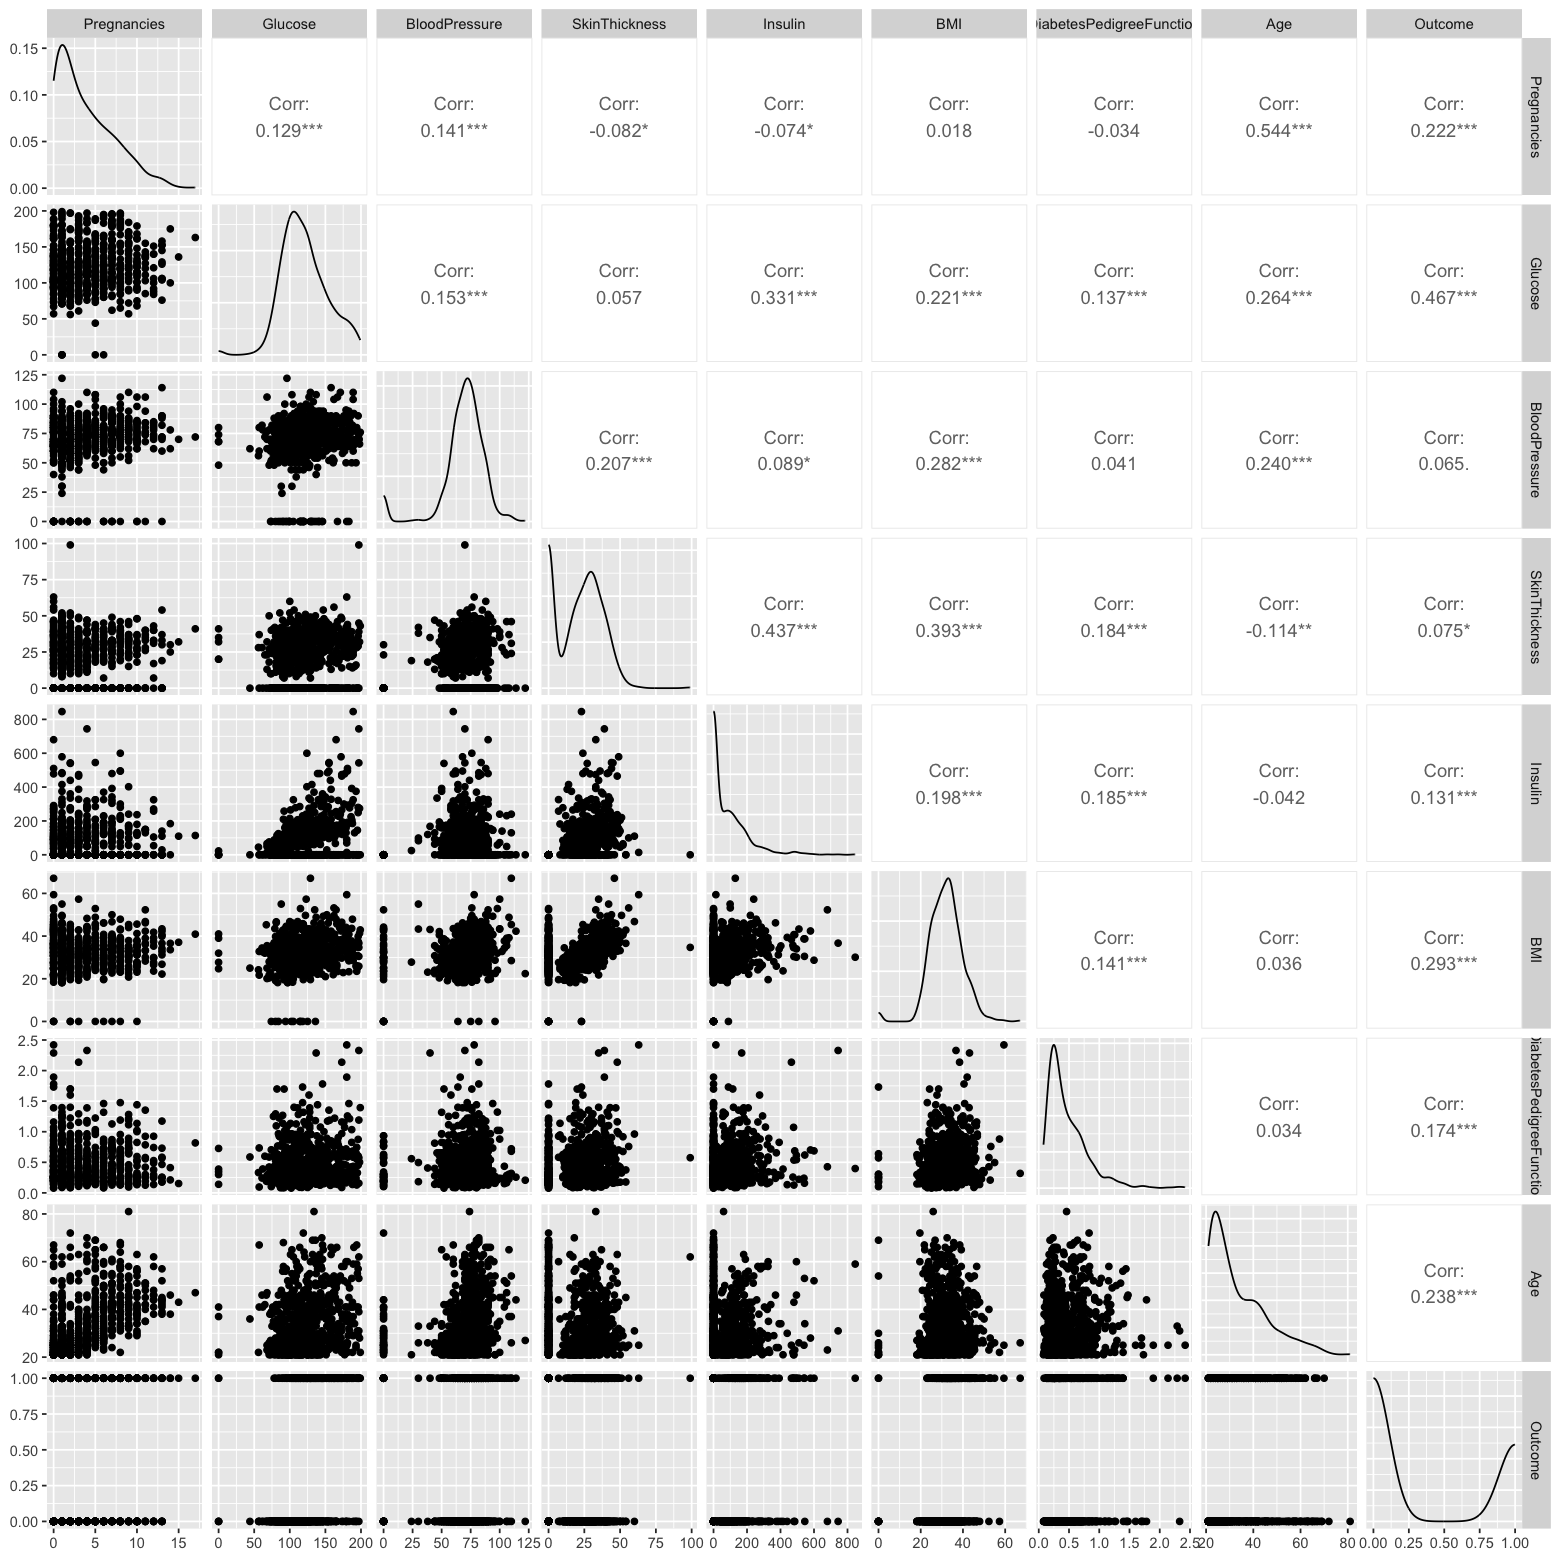

In [11]:
options(repr.plot.width = 13, repr.plot.height = 13)
ggpairs(diabetes_data)

The first visualization I propose is ggpairs(). This shows the correlation and relationships between all variables in the dataset. This is important for determining which variables have strong relationships with our target variable and understanding how the explanatory variables vary with each other. This visualization can inform what variables to focus on for further analysis.

`geom_smooth()` using formula = 'y ~ x'


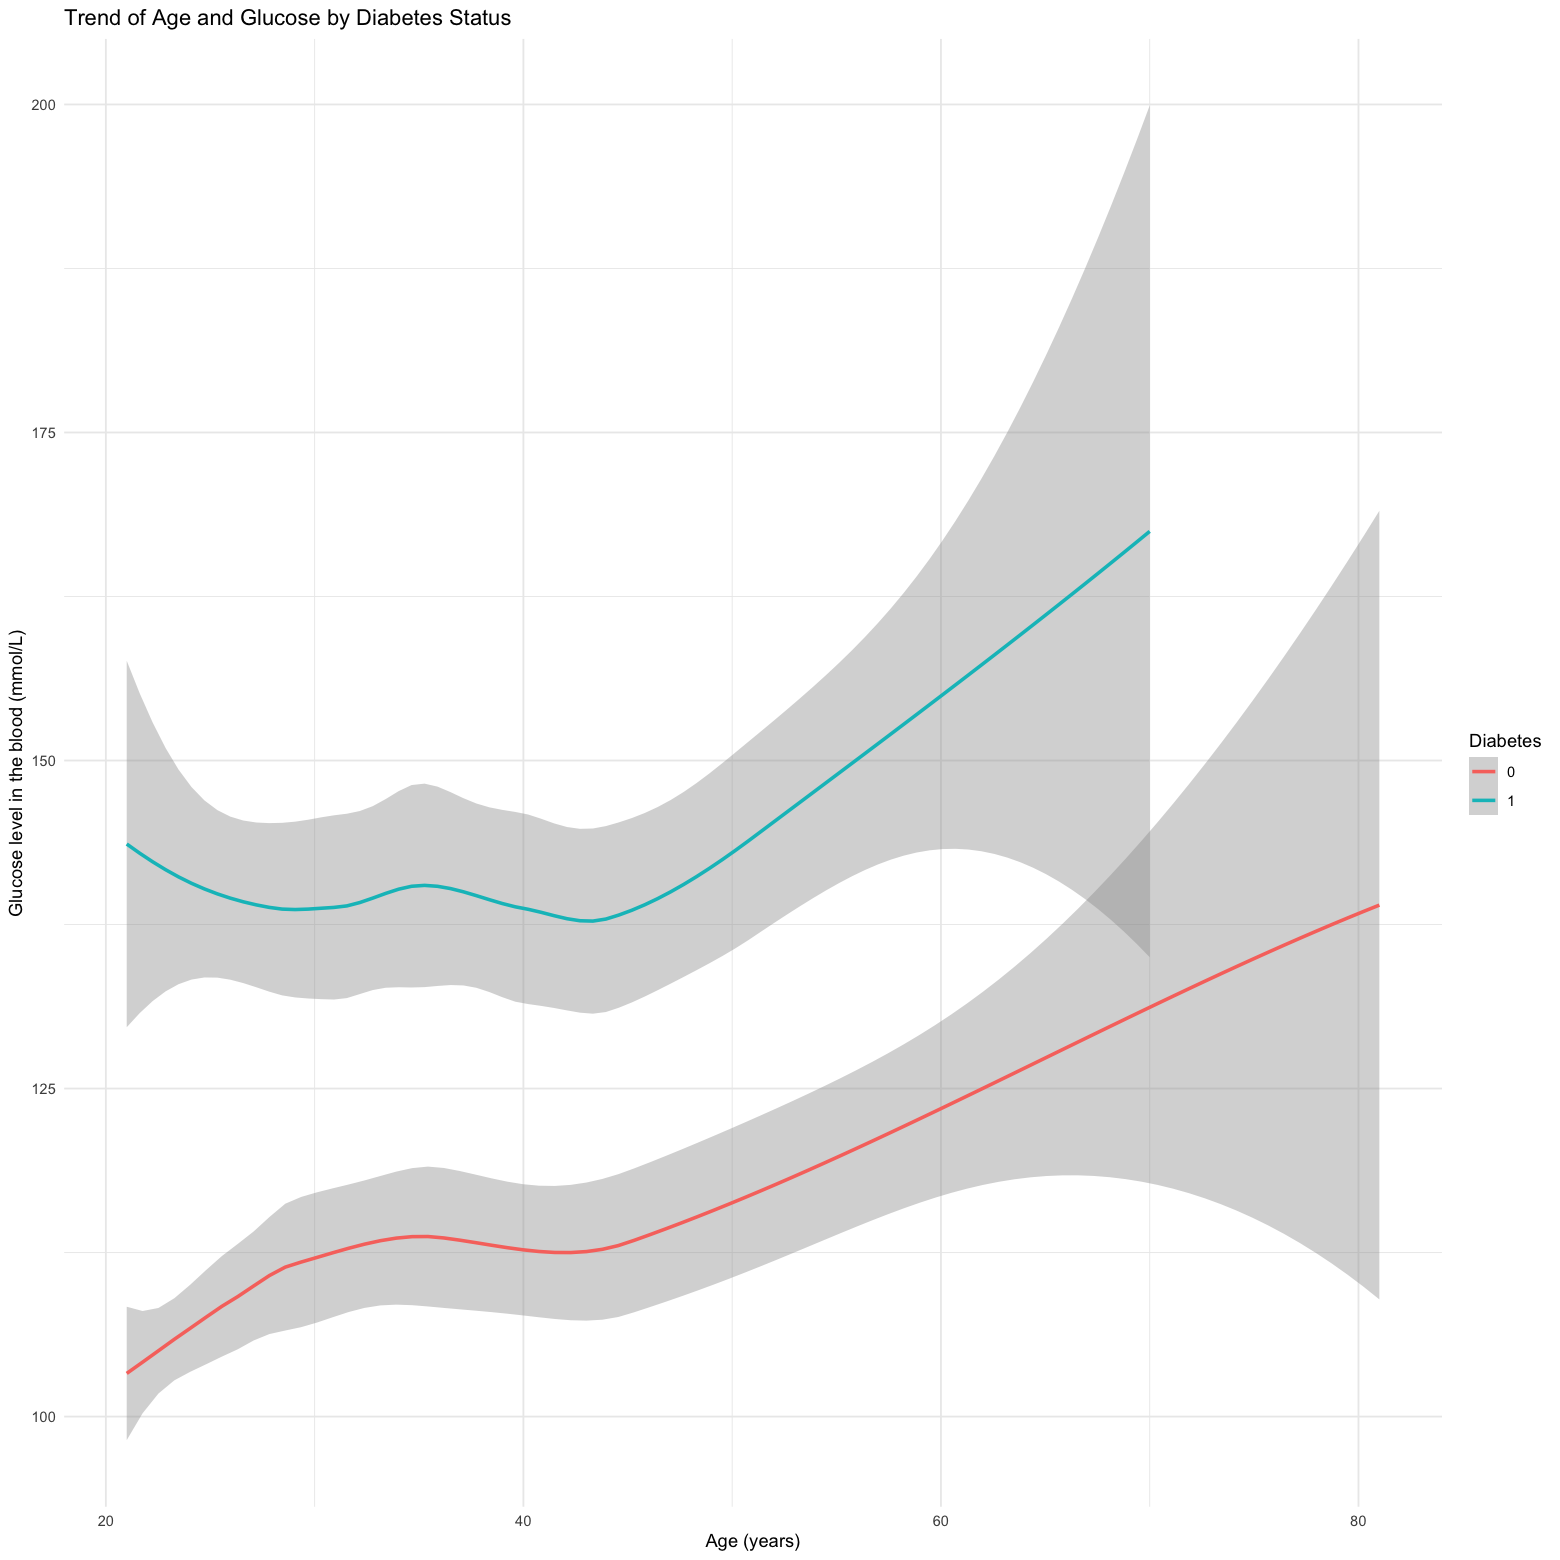

In [12]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
    geom_smooth(method = "loess") +
    labs(title = "Trend of Age and Glucose by Diabetes Status",
         x = "Age (years)",
         y = "Glucose level in the blood (mmol/L)",
         color = "Diabetes") +
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


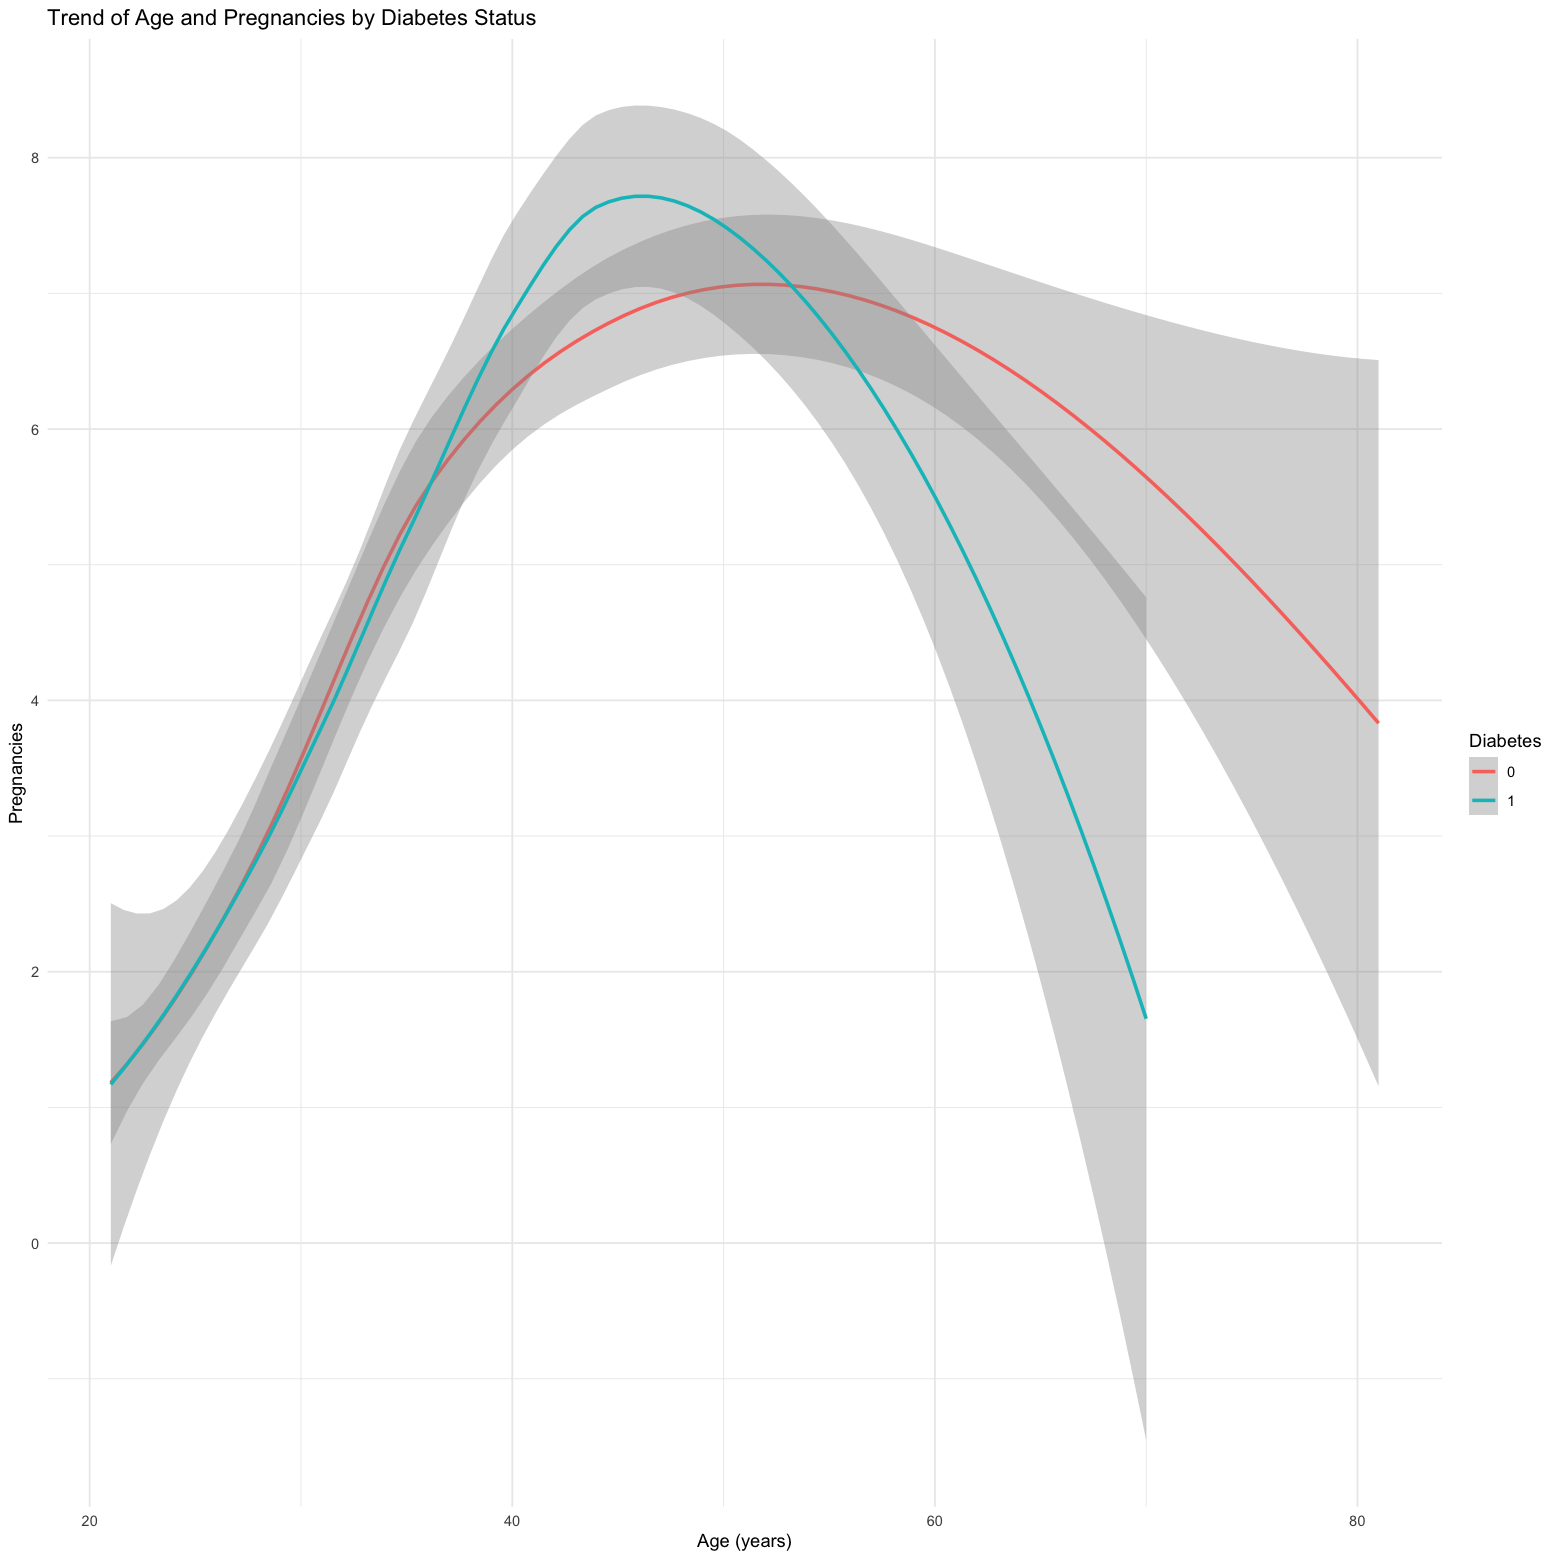

In [13]:
ggplot(diabetes_data, aes(x = Age, y = Pregnancies, color = as.factor(Outcome))) +
    geom_smooth(method = "loess") +
    labs(title = "Trend of Age and Pregnancies by Diabetes Status",
         x = "Age (years)",
         y = "Pregnancies",
         color = "Diabetes") +
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


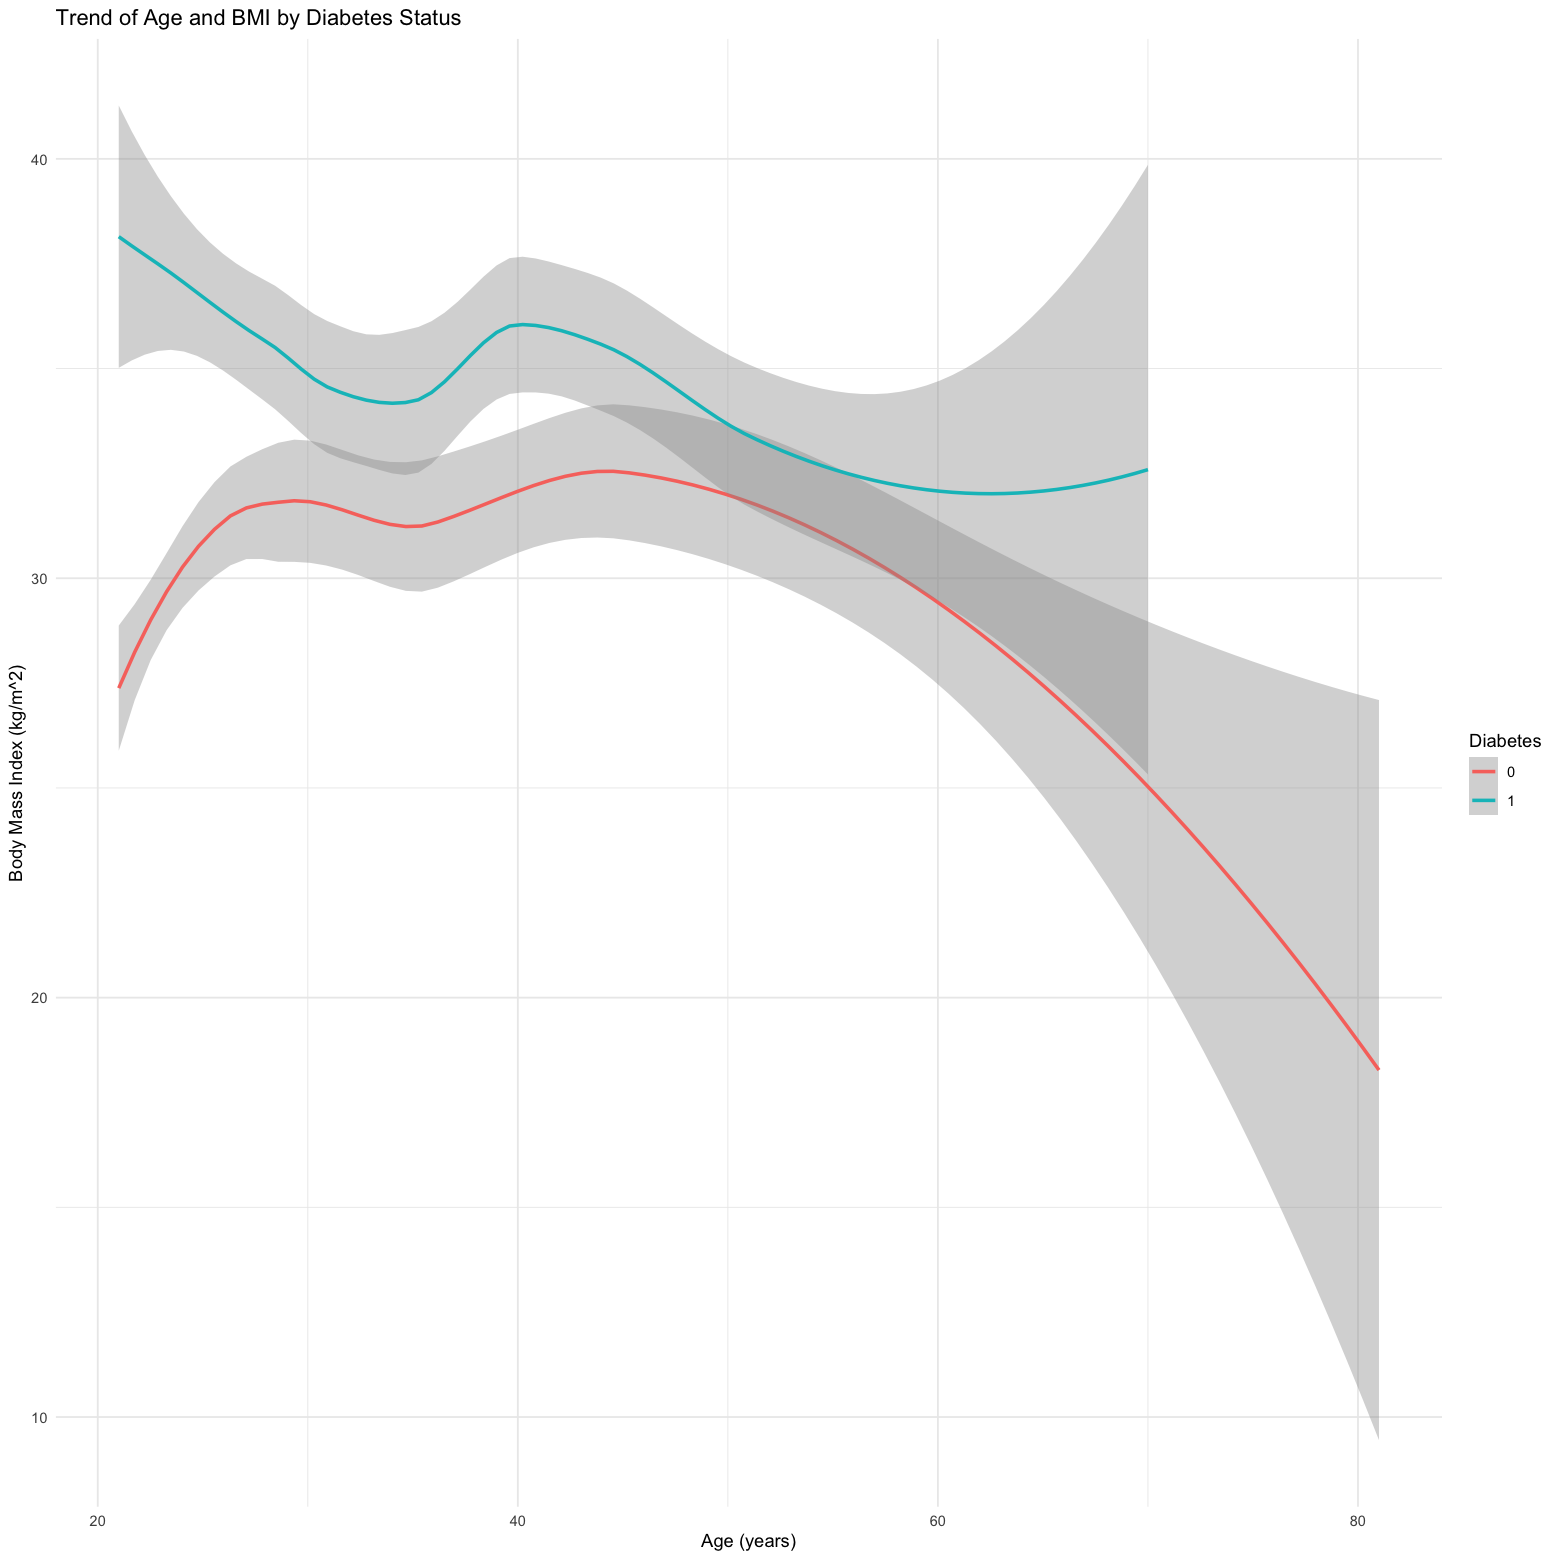

In [14]:
ggplot(diabetes_data, aes(x = Age, y = BMI, color = as.factor(Outcome))) +
    geom_smooth(method = "loess") +
    labs(title = "Trend of Age and BMI by Diabetes Status",
         x = "Age (years)",
         y = "Body Mass Index (kg/m^2)",
         color = "Diabetes") +
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


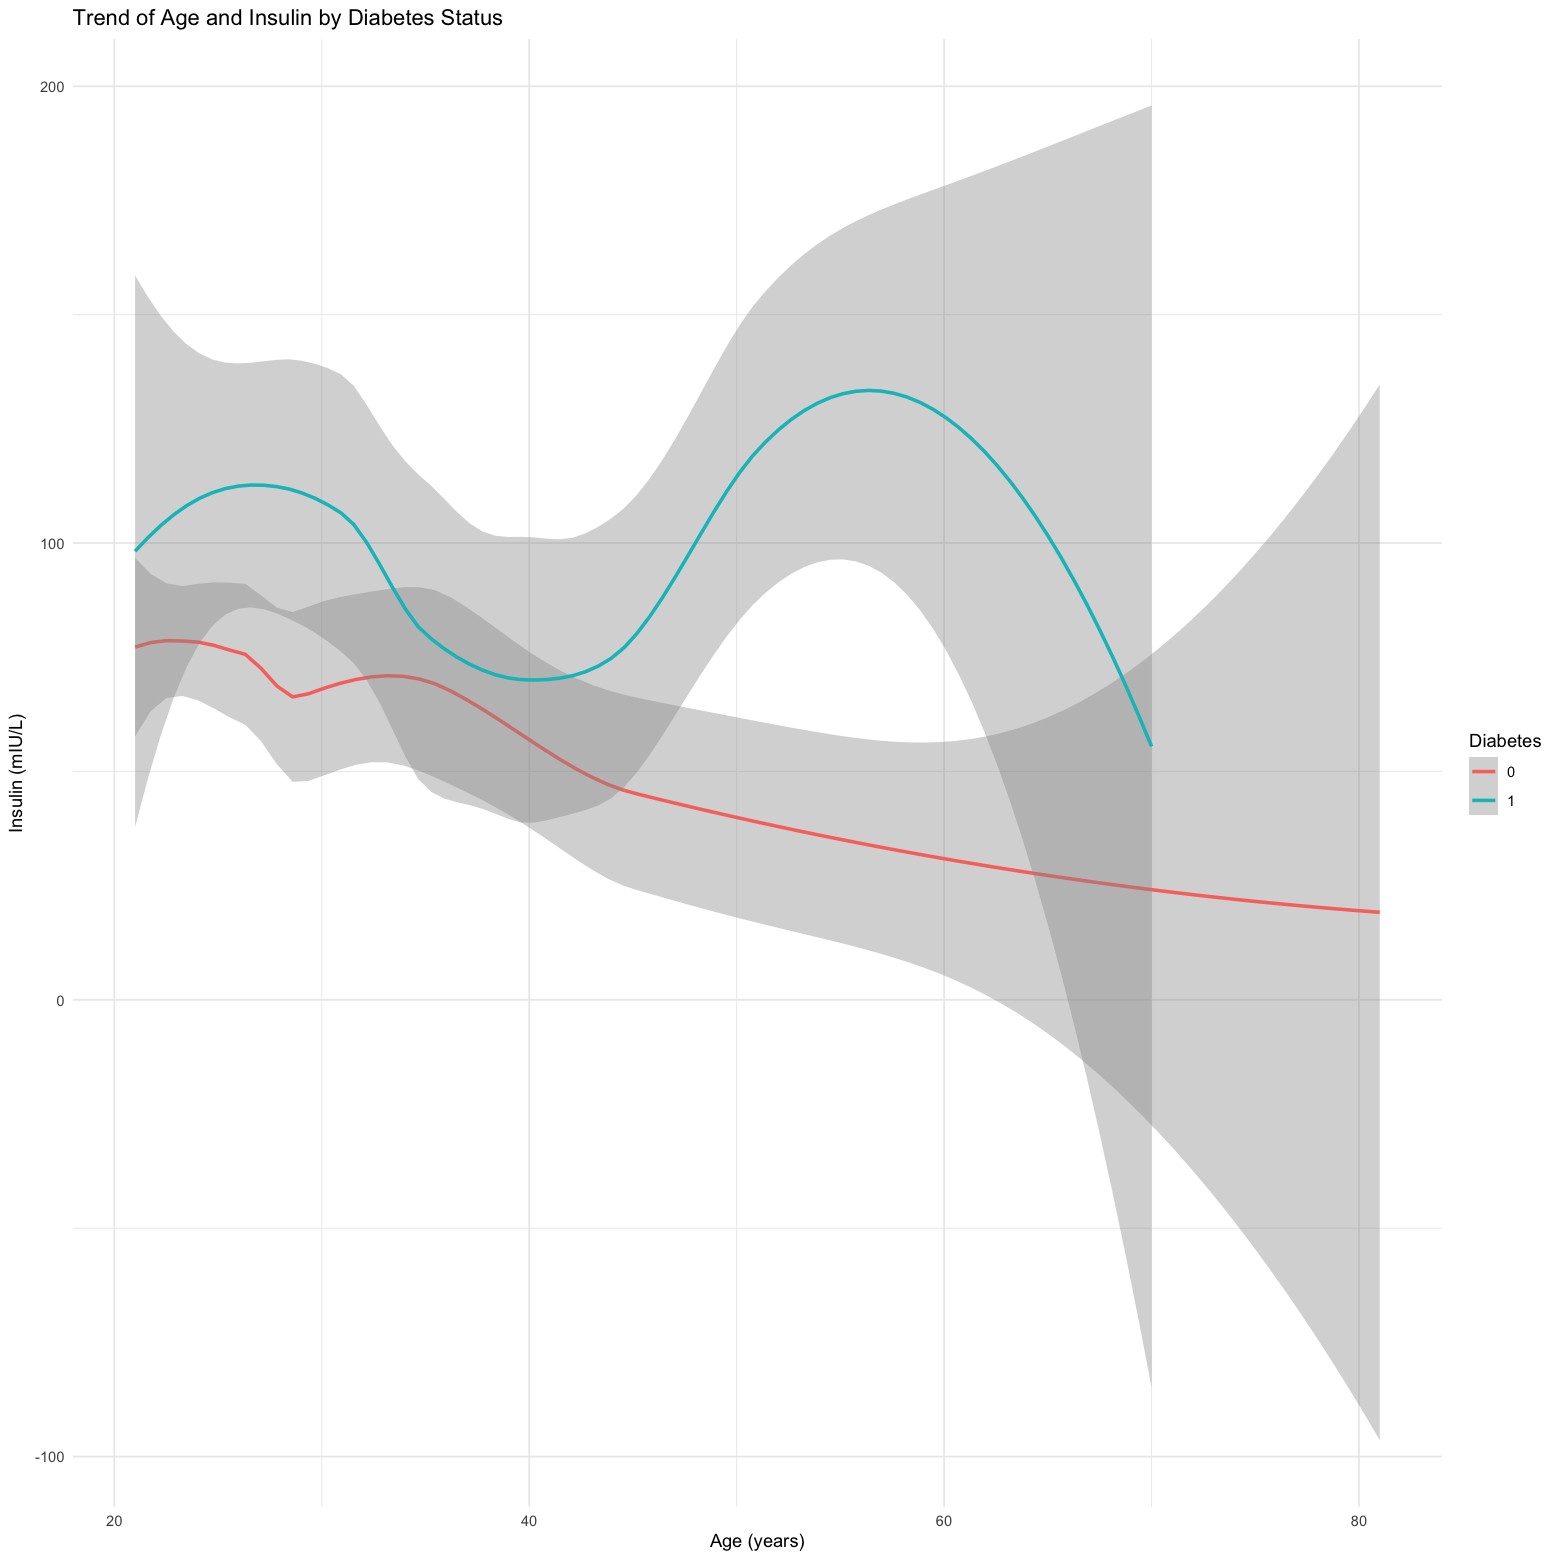

In [15]:
ggplot(diabetes_data, aes(x = Age, y = Insulin, color = as.factor(Outcome))) +
    geom_smooth(method = "loess") +
    labs(title = "Trend of Age and Insulin by Diabetes Status",
         x = "Age (years)",
         y = "Insulin (mIU/L)",
         color = "Diabetes") +
    theme_minimal()

The high quality visualizations I propose are plots of the relationship between age and different explanatory variables for individuals with and without diabetes. As the main question is how age affects diabetes risk and how age interacts with other explanatory variables this is a suitable plot to get an idea of these relationships. We can see here how individuals with diabetes differ from those without and also see how age may interact with other variables. This gives us a good idea to how to direct our analysis and what relationships may be worth exploring.

## Methods and Plan

I propose that we use a multivariate logistic regression model with interaction effects. This is an appropriate method since we have a binary response variable (outcome) where 0 denotes a patient without diabetes and 1 denotes a patient with diabetes. To be able to model this non-linear relationship we can use logistic regression in place of linear regression. This can answer our first main question: how does the incidence of diabetes change with age. But we also want to know how age interacts with other variables to influence the incidence of diabetes, so we will build a model with several explanatory variables that interact with age. 

This model assumes that response is binary, observations are independent of one another, there is minimal collinearity, there is a linear relationship between the log-odds and the explanatory variables, and the variance follows the typical structure of a binary variable. I will test these assumptions to ensure we are not violating any and the model is performing optimally. One crucial assumption is independence between variables. Some variables like age and pregnancy may naturally co-vary and we can test for this with VIF() and drop or correct any variables with high scores. I will also test for things like overdispersion. If these assumptions are violated and I cannot correct the issues then our model may not perform as well.

Beyond our data fulfilling the assumptions of the logistic regression model there are several other potential limitations associated with the model and the data. We want to be able to avoid overfitting the model and we want to choose a subset of the variables that perform well. To do this I will use backward selection to generate the best model. This dataset has some NA values that are present as 0s and we want to avoid fitting the model with these because they are misleading since they are not real measured values. Before fitting the model I will do some pre-processing to drop these values or select appropriate variables with few NA values. Additionally, using interactions in our model may increase the multicollinearity or disrupt the fit, so I will test several models including an age-only, a model with no interactions, and the model with interactions. I will make sure to minimize multicollinearity in these models and fit only the model with the best AIC.

Furthermore, the model may not make accurate predictions where there are few data points. For example, there is a smaller age range for those with diabetes which may impact the confidence of our predictions. However, as long as we account for these weaknesses and acknowledge the limitations we should be able to build a model and sufficiently answer our question.


## Implementation of Proposed Method

3) Write a computational code to implement *one* of the method proposed in the previous assignment (or suggested in the interview). 

4) Use *only one* visualization or table to report the results.

5) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. **Do not exceed the 4 sentences limit**.

#### Clean the data

In [16]:
# summarize the data which may be missing
zero_counts <- sapply(diabetes_data[, -which(names(diabetes_data) == "Outcome")], function(x) sum(x == 0))
zero_counts

# What can plausibly be zero: pregnancies, insulin
# need to drop them from Glucose, BloodPressure, BMI
# too many in SkinThickness, drop from the variable from the model all together

Pregnancies                  Glucose            BloodPressure 
                     111                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age 
                       0                        0

In [17]:
# need to get rid of the missing values
diabetes_data_clean <- diabetes_data %>%
  select(-SkinThickness) %>% # drop this column because it has too many null values
  filter(Glucose != 0 & BloodPressure != 0 & BMI != 0)

# summarize the new data sizes
dim(diabetes_data_clean) # not too much of a decrease
dim(diabetes_data)

[1] 724   8

[1] 768   9

#### Model Selection

In [19]:
# full model
model_int <- glm(formula = Outcome ~ Age * Pregnancies + Age* Glucose + Age * BloodPressure + Age * Insulin + Age * BMI + Age * DiabetesPedigreeFunction + Age,
      data = diabetes_data_clean,
      family = binomial)
model_results <- 
   tidy(model_int, conf.int =0.95) %>%
   mutate_if(is.numeric, round, 2)

model_results

model_add <- glm(formula = Outcome ~ Age + Pregnancies + Glucose + BloodPressure + Insulin + BMI + DiabetesPedigreeFunction,
      data = diabetes_data_clean,
      family = binomial)

# use step to do backward selection
backward_model_int <- step(model_int, direction = "backward")
backward_model_add <- step(model_add, direction = "backward")

summary(backward_model_int)
summary(backward_model_add)

term                         estimate std.error statistic p.value conf.low
1  (Intercept)                  -13.25   2.58      -5.13     0.00    -18.41  
2  Age                            0.13   0.07       1.84     0.07     -0.01  
3  Pregnancies                    0.50   0.13       3.90     0.00      0.25  
4  Glucose                        0.07   0.01       5.37     0.00      0.04  
5  BloodPressure                 -0.04   0.03      -1.31     0.19     -0.09  
6  Insulin                       -0.01   0.00      -3.61     0.00     -0.02  
7  BMI                            0.13   0.05       2.42     0.02      0.03  
8  DiabetesPedigreeFunction       2.10   1.08       1.95     0.05      0.00  
9  Age:Pregnancies               -0.01   0.00      -3.34     0.00     -0.02  
10 Age:Glucose                    0.00   0.00      -2.55     0.01      0.00  
11 Age:BloodPressure              0.00   0.00       0.95     0.34      0.00  
12 Age:Insulin                    0.00   0.00       3.40     0.00      0.00  
13 Age:BMI                        0.00   0.00      -0.59     0.55      0.00  
14 Age:DiabetesPedigreeFunction  -0.03   0.03      -1.09     0.28     -0.09  
   conf.high
1  -8.24    
2   0.27    
3   0.75    
4   0.09    
5   0.02    
6   0.00    
7   0.23    
8   4.23    
9   0.00    
10  0.00    
11  0.00    
12  0.00    
13  0.00    
14  0.03

Start:  AIC=671.78
Outcome ~ Age * Pregnancies + Age * Glucose + Age * BloodPressure + 
    Age * Insulin + Age * BMI + Age * DiabetesPedigreeFunction + 
    Age

                               Df Deviance    AIC
- Age:BMI                       1   644.13 670.13
- Age:BloodPressure             1   644.68 670.68
- Age:DiabetesPedigreeFunction  1   644.97 670.97
<none>                              643.78 671.78
- Age:Glucose                   1   650.08 676.08
- Age:Pregnancies               1   655.38 681.38
- Age:Insulin                   1   657.31 683.31

Step:  AIC=670.13
Outcome ~ Age + Pregnancies + Glucose + BloodPressure + Insulin + 
    BMI + DiabetesPedigreeFunction + Age:Pregnancies + Age:Glucose + 
    Age:BloodPressure + Age:Insulin + Age:DiabetesPedigreeFunction

                               Df Deviance    AIC
- Age:BloodPressure             1   644.74 668.74
- Age:DiabetesPedigreeFunction  1   645.35 669.35
<none>                              644.13 670.13
- Age:Glucose


Call:
glm(formula = Outcome ~ Age + Pregnancies + Glucose + Insulin + 
    BMI + DiabetesPedigreeFunction + Age:Pregnancies + Age:Glucose + 
    Age:Insulin, family = binomial, data = diabetes_data_clean)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.344e+01  1.648e+00  -8.156 3.47e-16 ***
Age                       1.234e-01  4.077e-02   3.027 0.002469 ** 
Pregnancies               4.545e-01  1.207e-01   3.766 0.000166 ***
Glucose                   6.134e-02  1.193e-02   5.140 2.75e-07 ***
Insulin                  -9.203e-03  2.748e-03  -3.349 0.000811 ***
BMI                       9.134e-02  1.575e-02   5.801 6.59e-09 ***
DiabetesPedigreeFunction  9.865e-01  3.148e-01   3.134 0.001723 ** 
Age:Pregnancies          -9.318e-03  2.939e-03  -3.171 0.001522 ** 
Age:Glucose              -6.598e-04  2.965e-04  -2.225 0.026084 *  
Age:Insulin               2.360e-04  7.495e-05   3.149 0.001637 ** 
---
Signif. codes:  0 ‘***’ 0.0


Call:
glm(formula = Outcome ~ Age + Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
    family = binomial, data = diabetes_data_clean)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.313824   0.753602 -12.359  < 2e-16 ***
Age                       0.014446   0.009500   1.521  0.12838    
Pregnancies               0.116028   0.033284   3.486  0.00049 ***
Glucose                   0.034783   0.003566   9.753  < 2e-16 ***
BMI                       0.086147   0.015035   5.730    1e-08 ***
DiabetesPedigreeFunction  0.969342   0.305185   3.176  0.00149 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 931.94  on 723  degrees of freedom
Residual deviance: 673.93  on 718  degrees of freedom
AIC: 685.93

Number of Fisher Scoring iterations: 5


In [50]:
# best model from the backward selection
best_model <- glm(formula = Outcome ~ Age + Pregnancies + Glucose + Insulin + 
    BMI + DiabetesPedigreeFunction + Age:Pregnancies + Age:Glucose + 
    Age:Insulin, family = binomial, data = diabetes_data_clean)
best_model_add <- glm(formula = Outcome ~ Age + Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
    family = binomial, data = diabetes_data_clean)
age_only_model <- glm(formula = Outcome ~ Age, family = binomial, data = diabetes_data_clean)

AIC(best_model)
AIC(best_model_add)
AIC(age_only_model)

[1] 667.754

[1] 685.9325

[1] 893.115

In [51]:
best_model_results <- 
   tidy(best_model, conf.int =0.95) %>%
   mutate_if(is.numeric, round, 2)

best_model_results

term                     estimate std.error statistic p.value conf.low
1  (Intercept)              -13.44   1.65      -8.16     0.00    -16.75  
2  Age                        0.12   0.04       3.03     0.00      0.04  
3  Pregnancies                0.45   0.12       3.77     0.00      0.22  
4  Glucose                    0.06   0.01       5.14     0.00      0.04  
5  Insulin                   -0.01   0.00      -3.35     0.00     -0.01  
6  BMI                        0.09   0.02       5.80     0.00      0.06  
7  DiabetesPedigreeFunction   0.99   0.31       3.13     0.00      0.38  
8  Age:Pregnancies           -0.01   0.00      -3.17     0.00     -0.02  
9  Age:Glucose                0.00   0.00      -2.22     0.03      0.00  
10 Age:Insulin                0.00   0.00       3.15     0.00      0.00  
   conf.high
1  -10.27   
2    0.20   
3    0.70   
4    0.09   
5    0.00   
6    0.12   
7    1.61   
8    0.00   
9    0.00   
10   0.00

#### Test Assumptions

In [52]:
# test for multicollinearity
VIF_log_diabetes <- vif(best_model, type = 'terms')
round(VIF_log_diabetes, 3)
VIF_log_diabetes <- vif(best_model_add, type = 'terms')
round(VIF_log_diabetes, 3)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



Age              Pregnancies                  Glucose 
                  25.274                   17.752                   10.966 
                 Insulin                      BMI DiabetesPedigreeFunction 
                  11.174                    1.076                    1.030 
         Age:Pregnancies              Age:Glucose              Age:Insulin 
                  25.043                   37.331                   10.079

Age              Pregnancies                  Glucose 
                   1.449                    1.420                    1.033 
                     BMI DiabetesPedigreeFunction 
                   1.028                    1.008

In [53]:
# drop some things to fix the vif
best_model <- glm(formula = Outcome ~ Pregnancies + Glucose +  
    BMI + DiabetesPedigreeFunction + Age:Glucose + 
    Age:Insulin, family = binomial, data = diabetes_data_clean)

VIF_log_diabetes <- vif(best_model, type = 'predictor')
round(VIF_log_diabetes, 3)

Warning message in vif.lm(best_model, type = "predictor"):
“type = 'predictor' is available only for unweighted linear models;
  type = 'terms' will be used”


Pregnancies                  Glucose                      BMI 
                   1.353                    1.838                    1.041 
DiabetesPedigreeFunction              Glucose:Age              Age:Insulin 
                   1.020                    2.138                    1.116


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.0118, p-value = 0.776
alternative hypothesis: two.sided


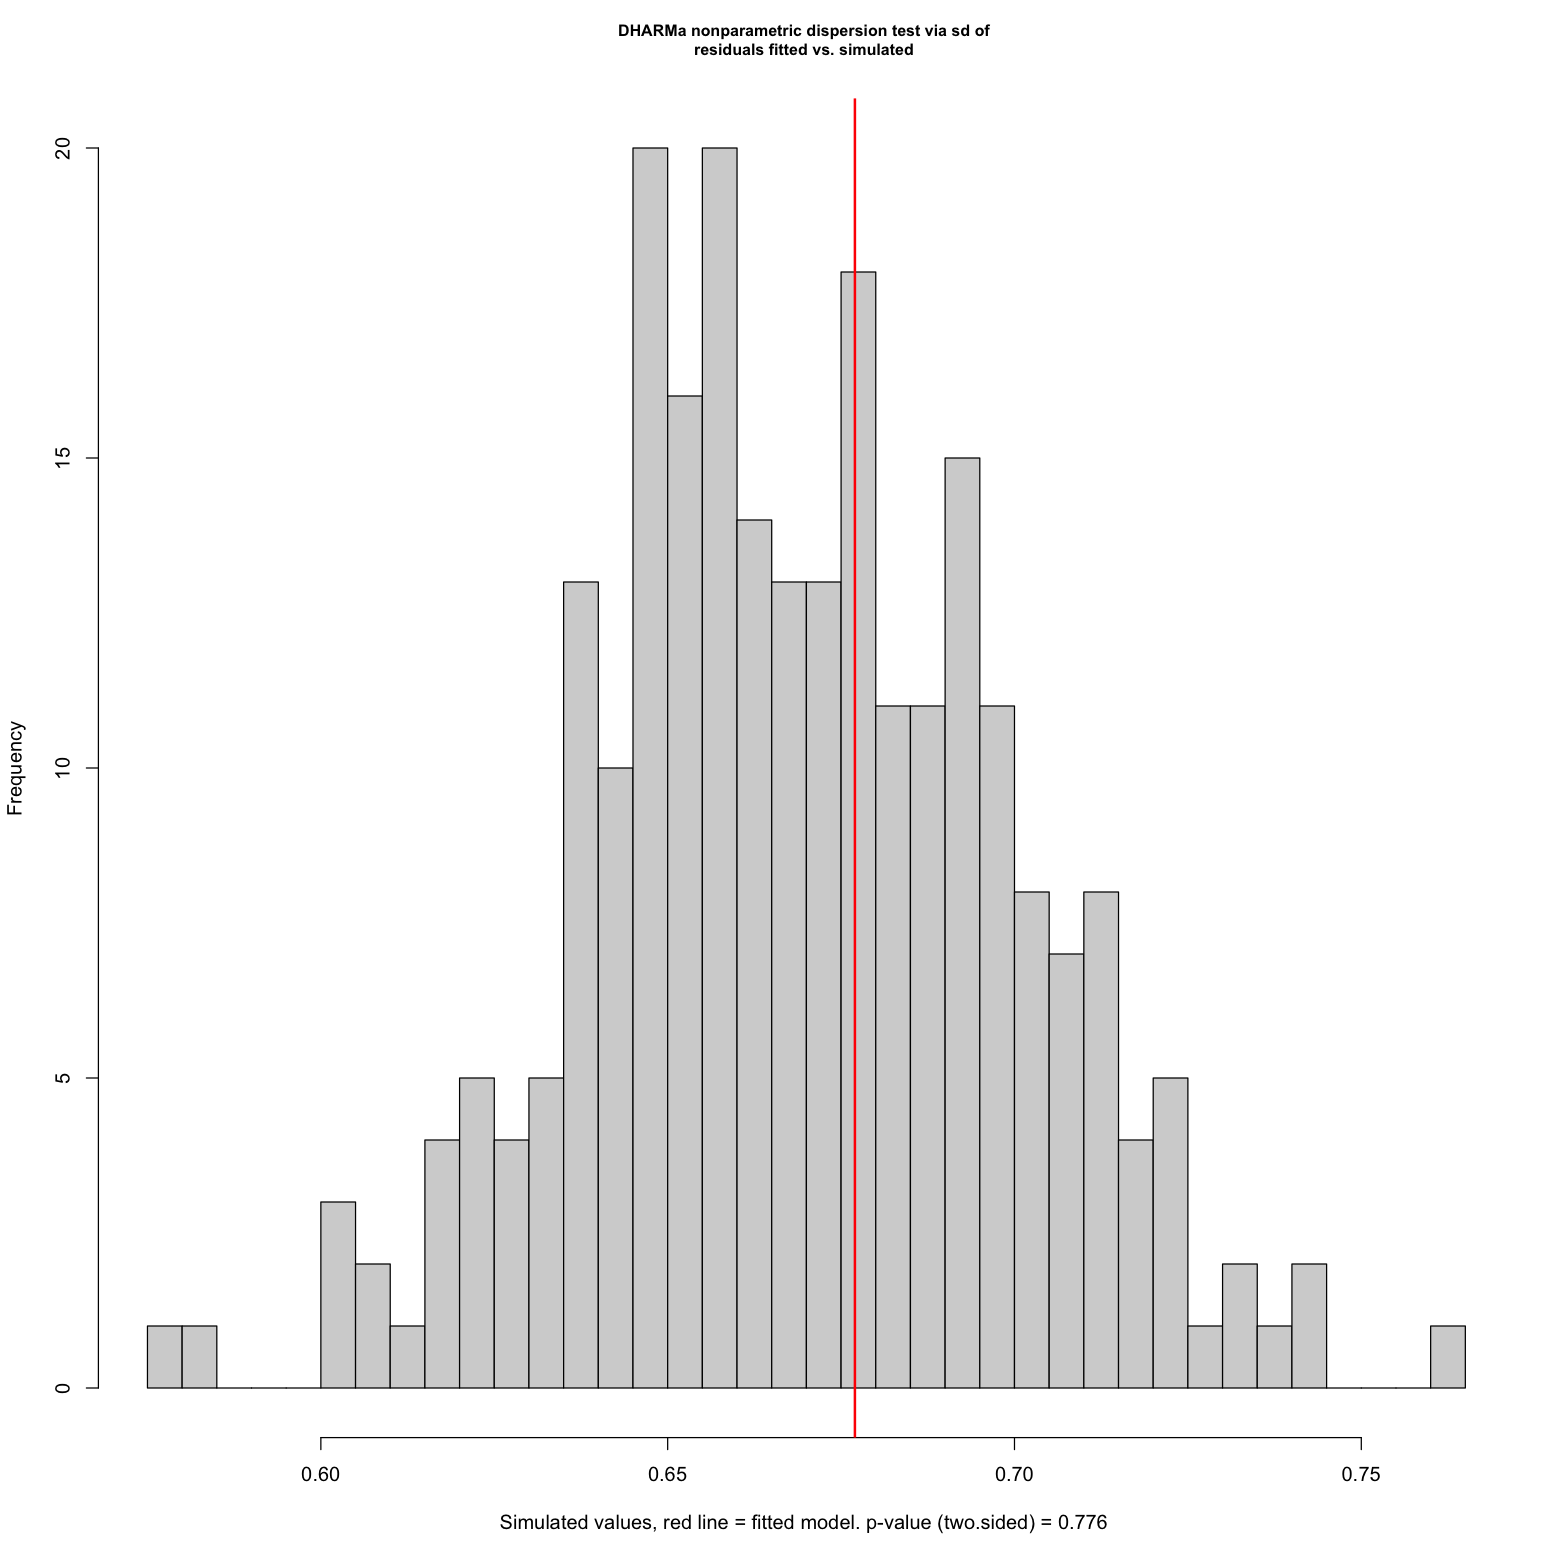


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.0133, p-value = 0.768
alternative hypothesis: two.sided


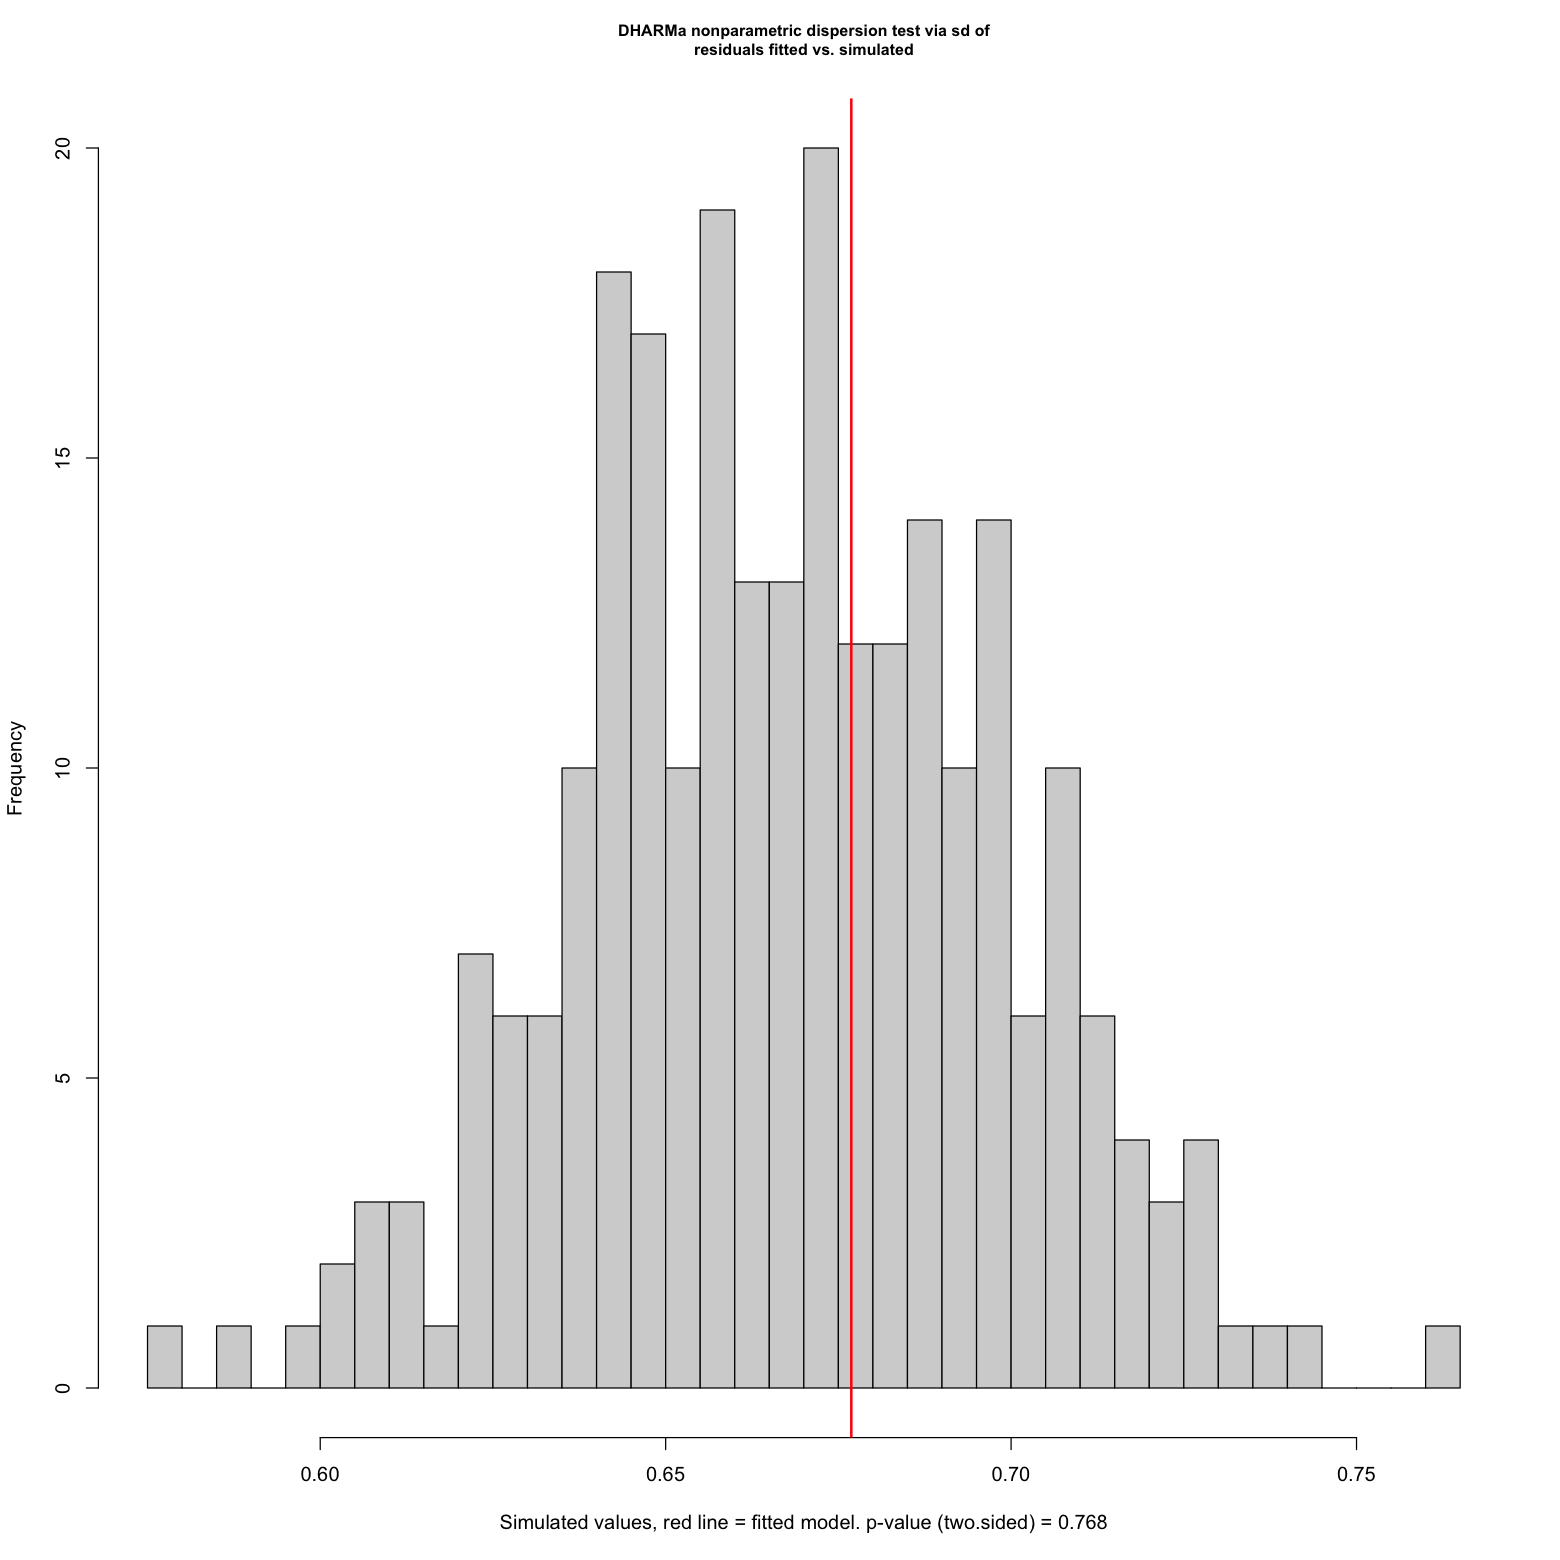

In [54]:
# test for overdispersion
testDispersion(best_model)
testDispersion(best_model_add)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


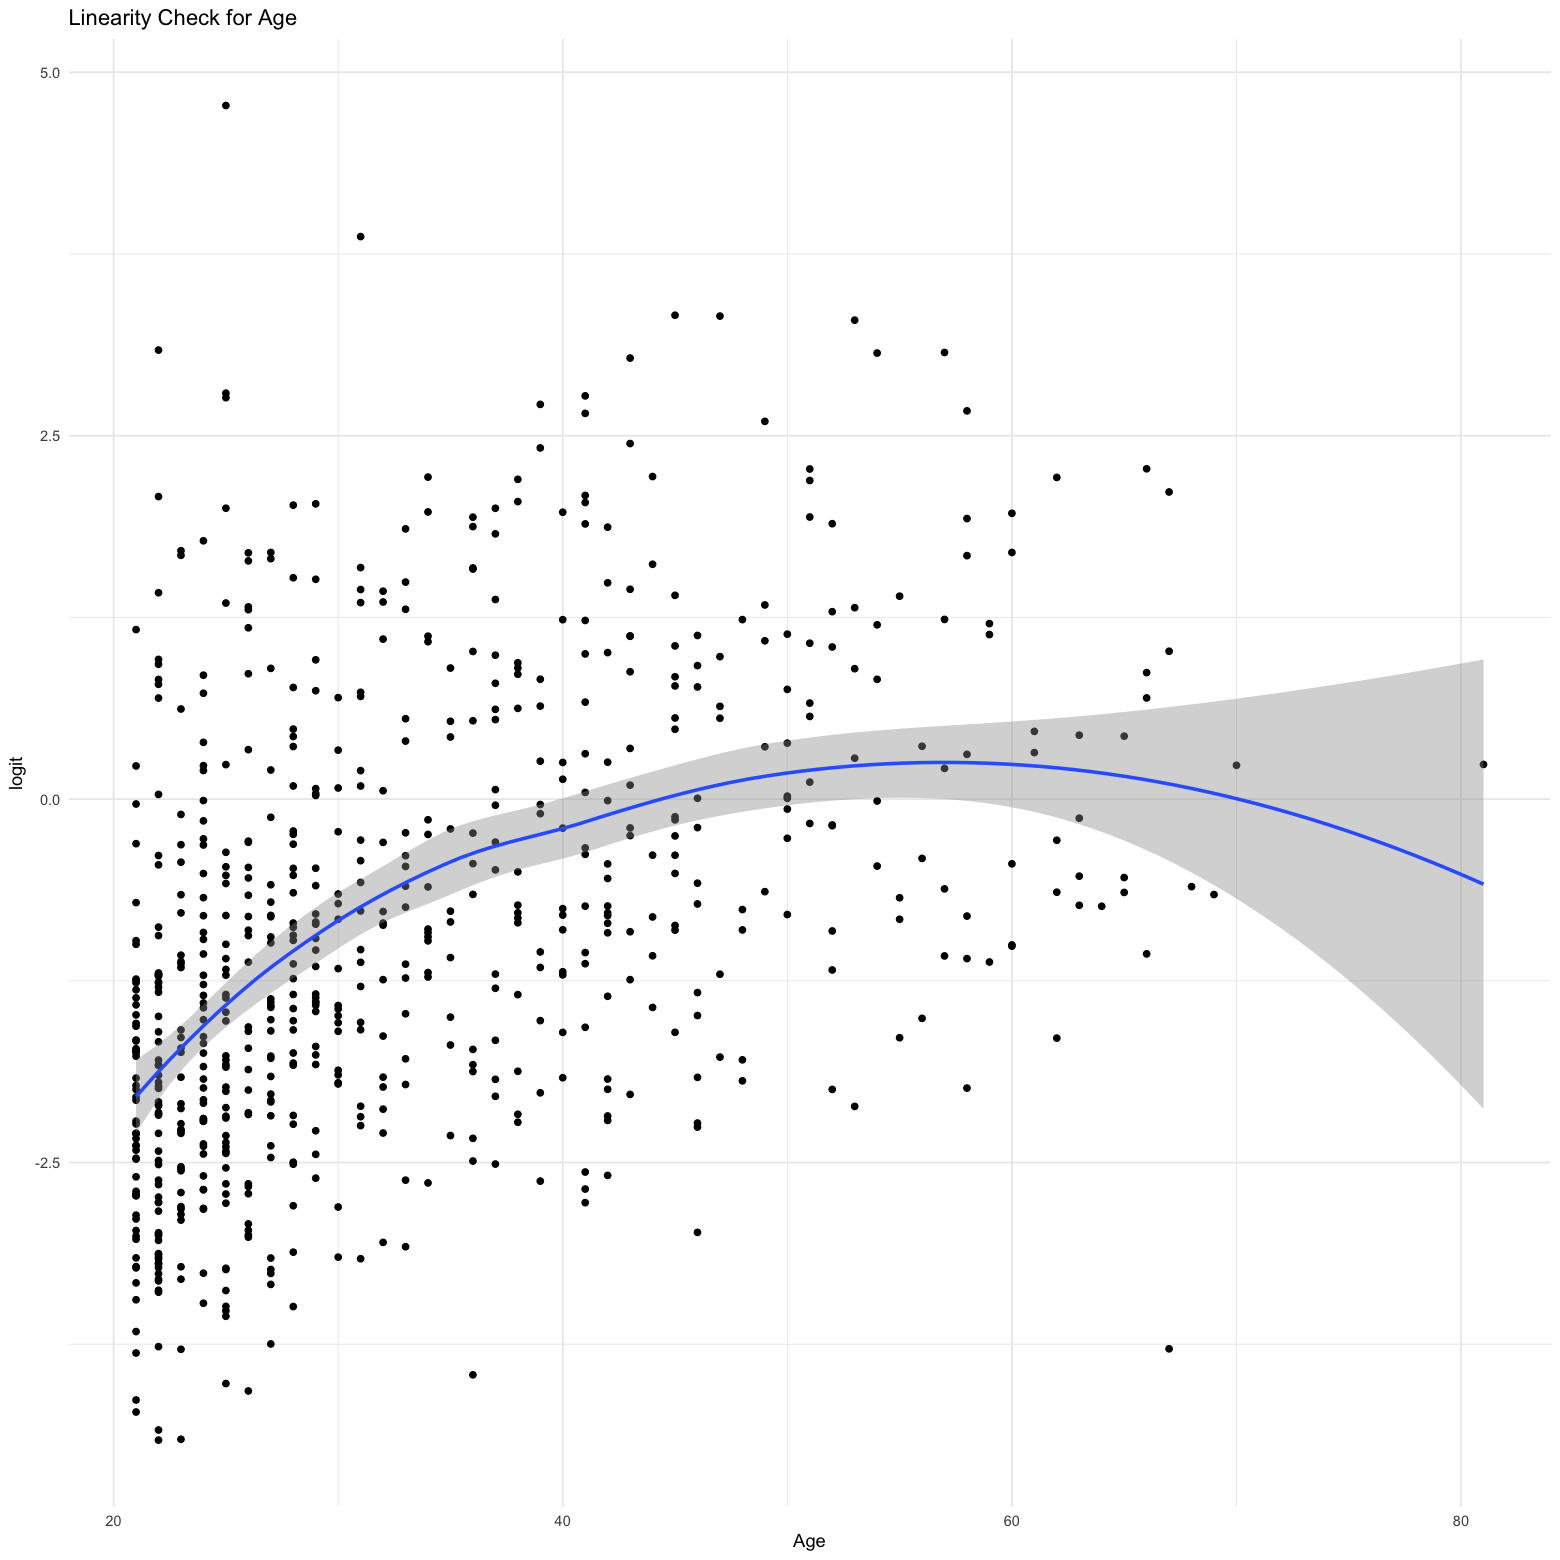

`geom_smooth()` using formula = 'y ~ x'


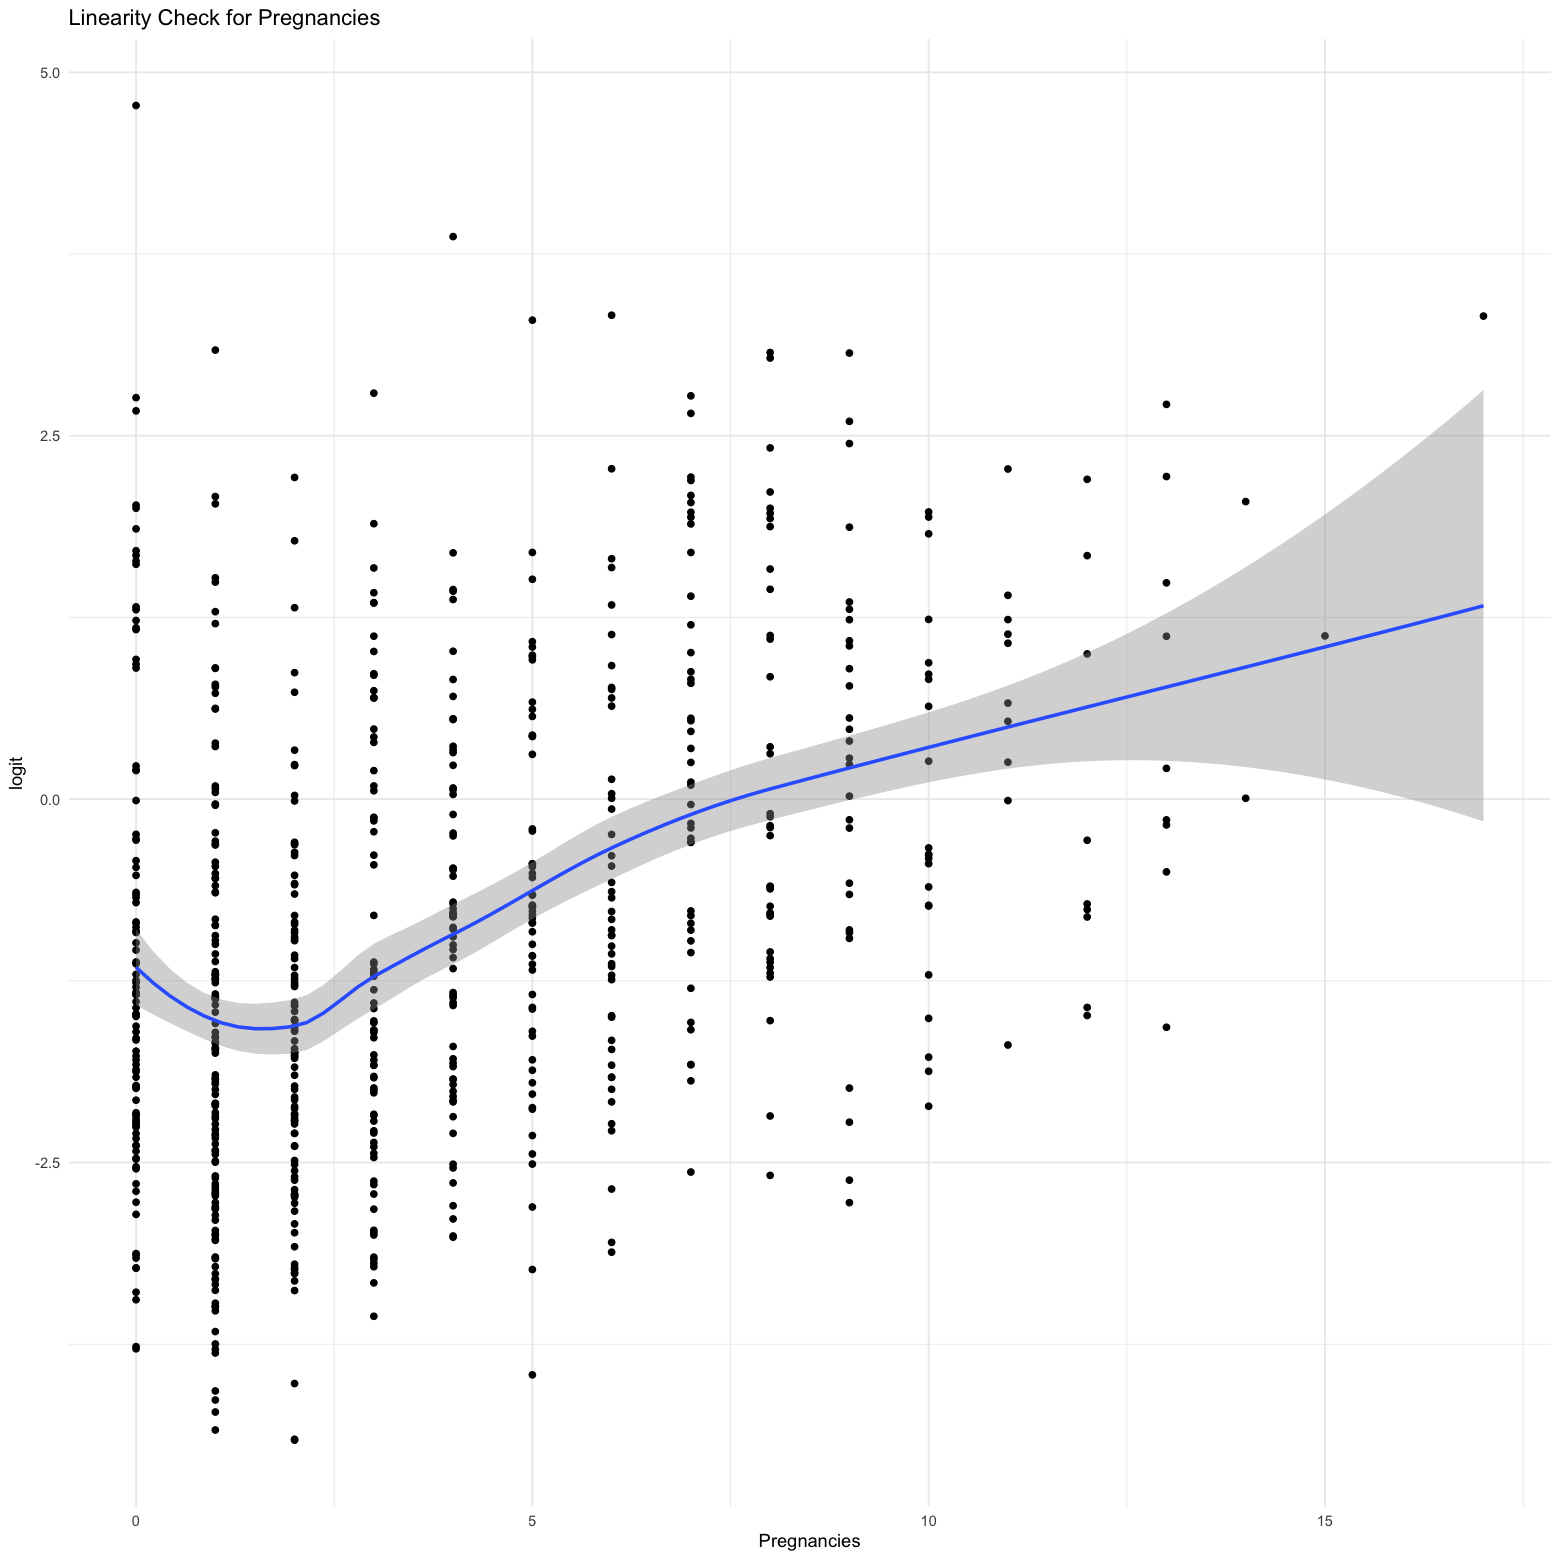

`geom_smooth()` using formula = 'y ~ x'


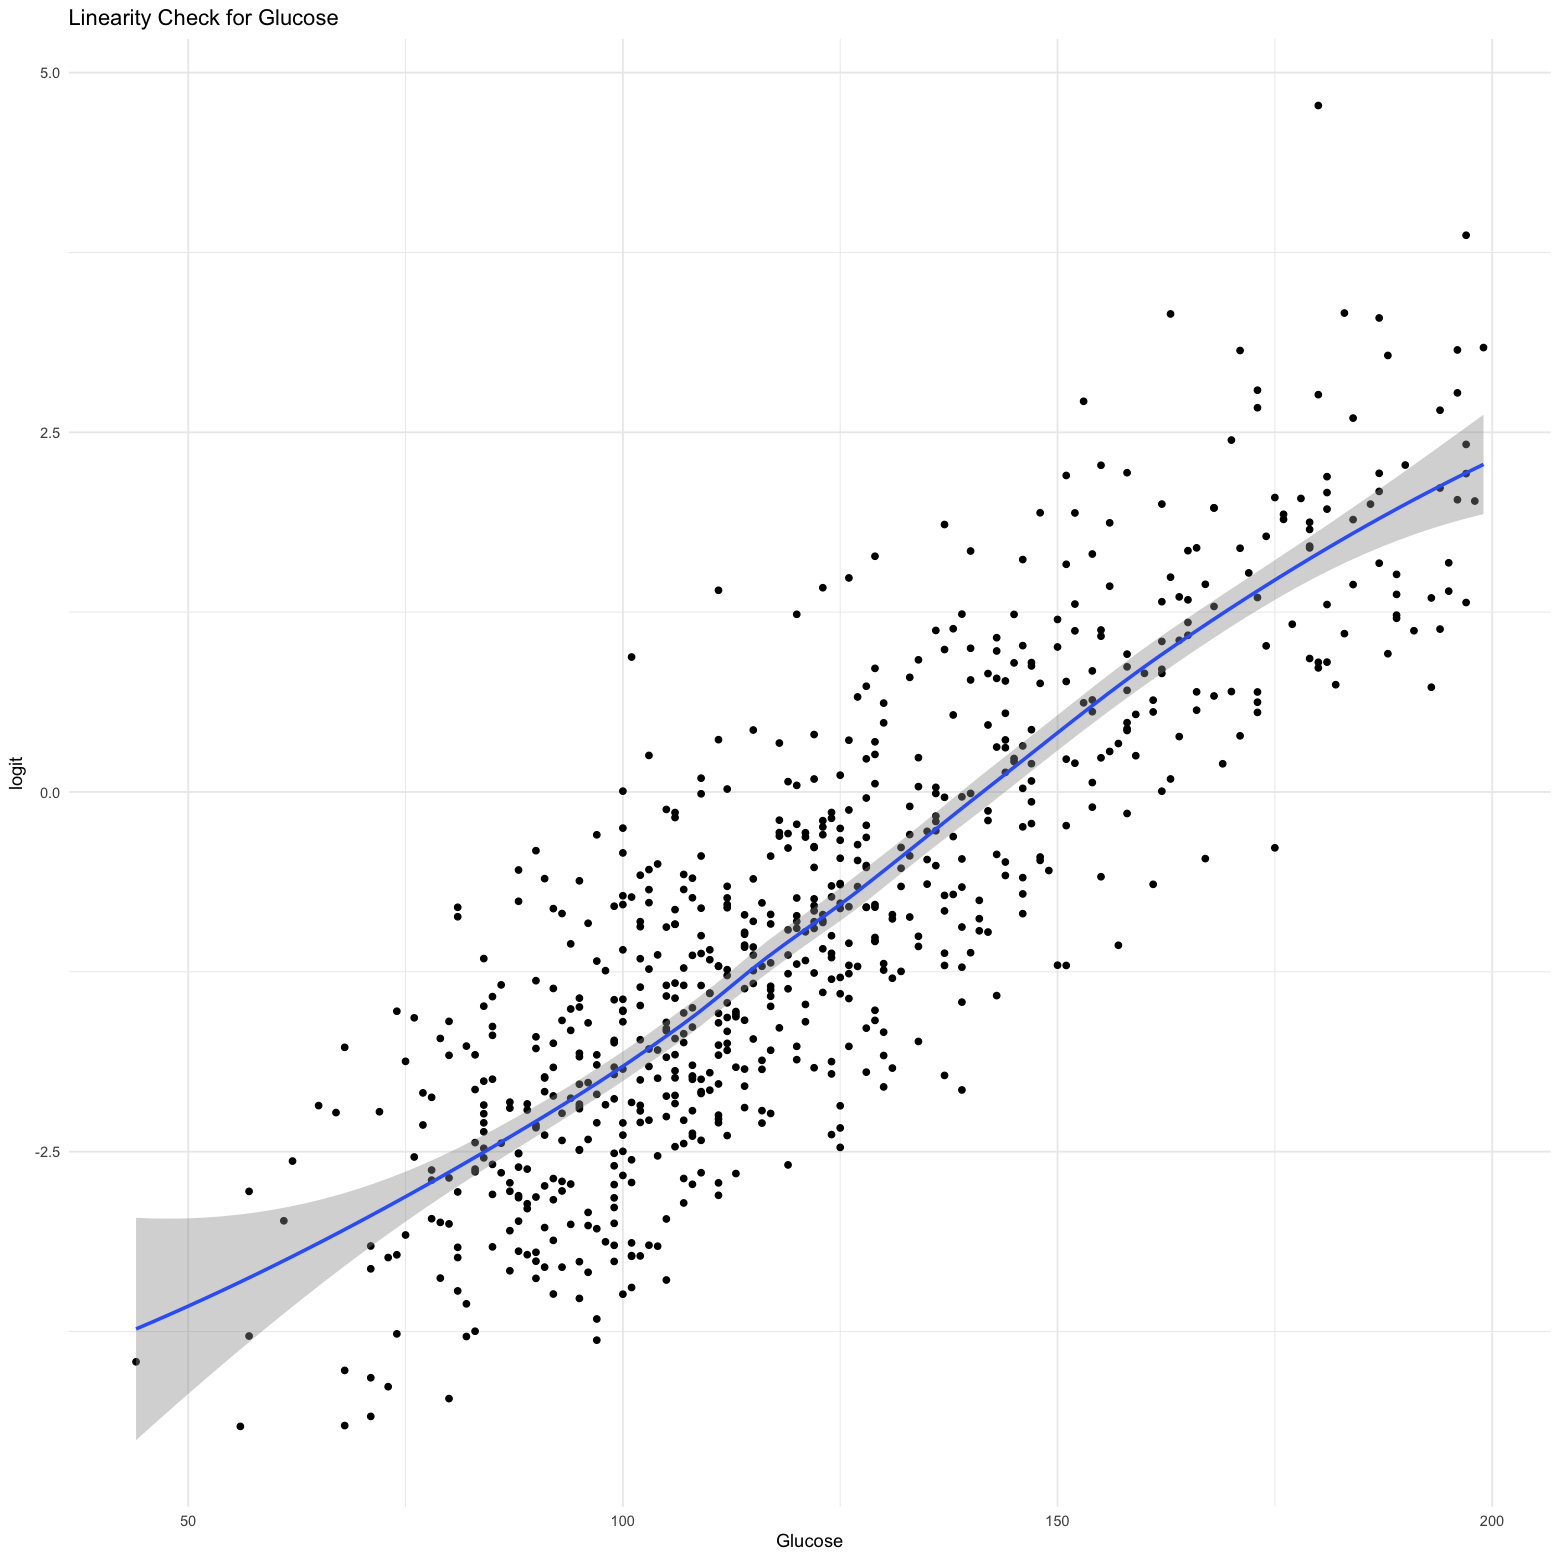

`geom_smooth()` using formula = 'y ~ x'


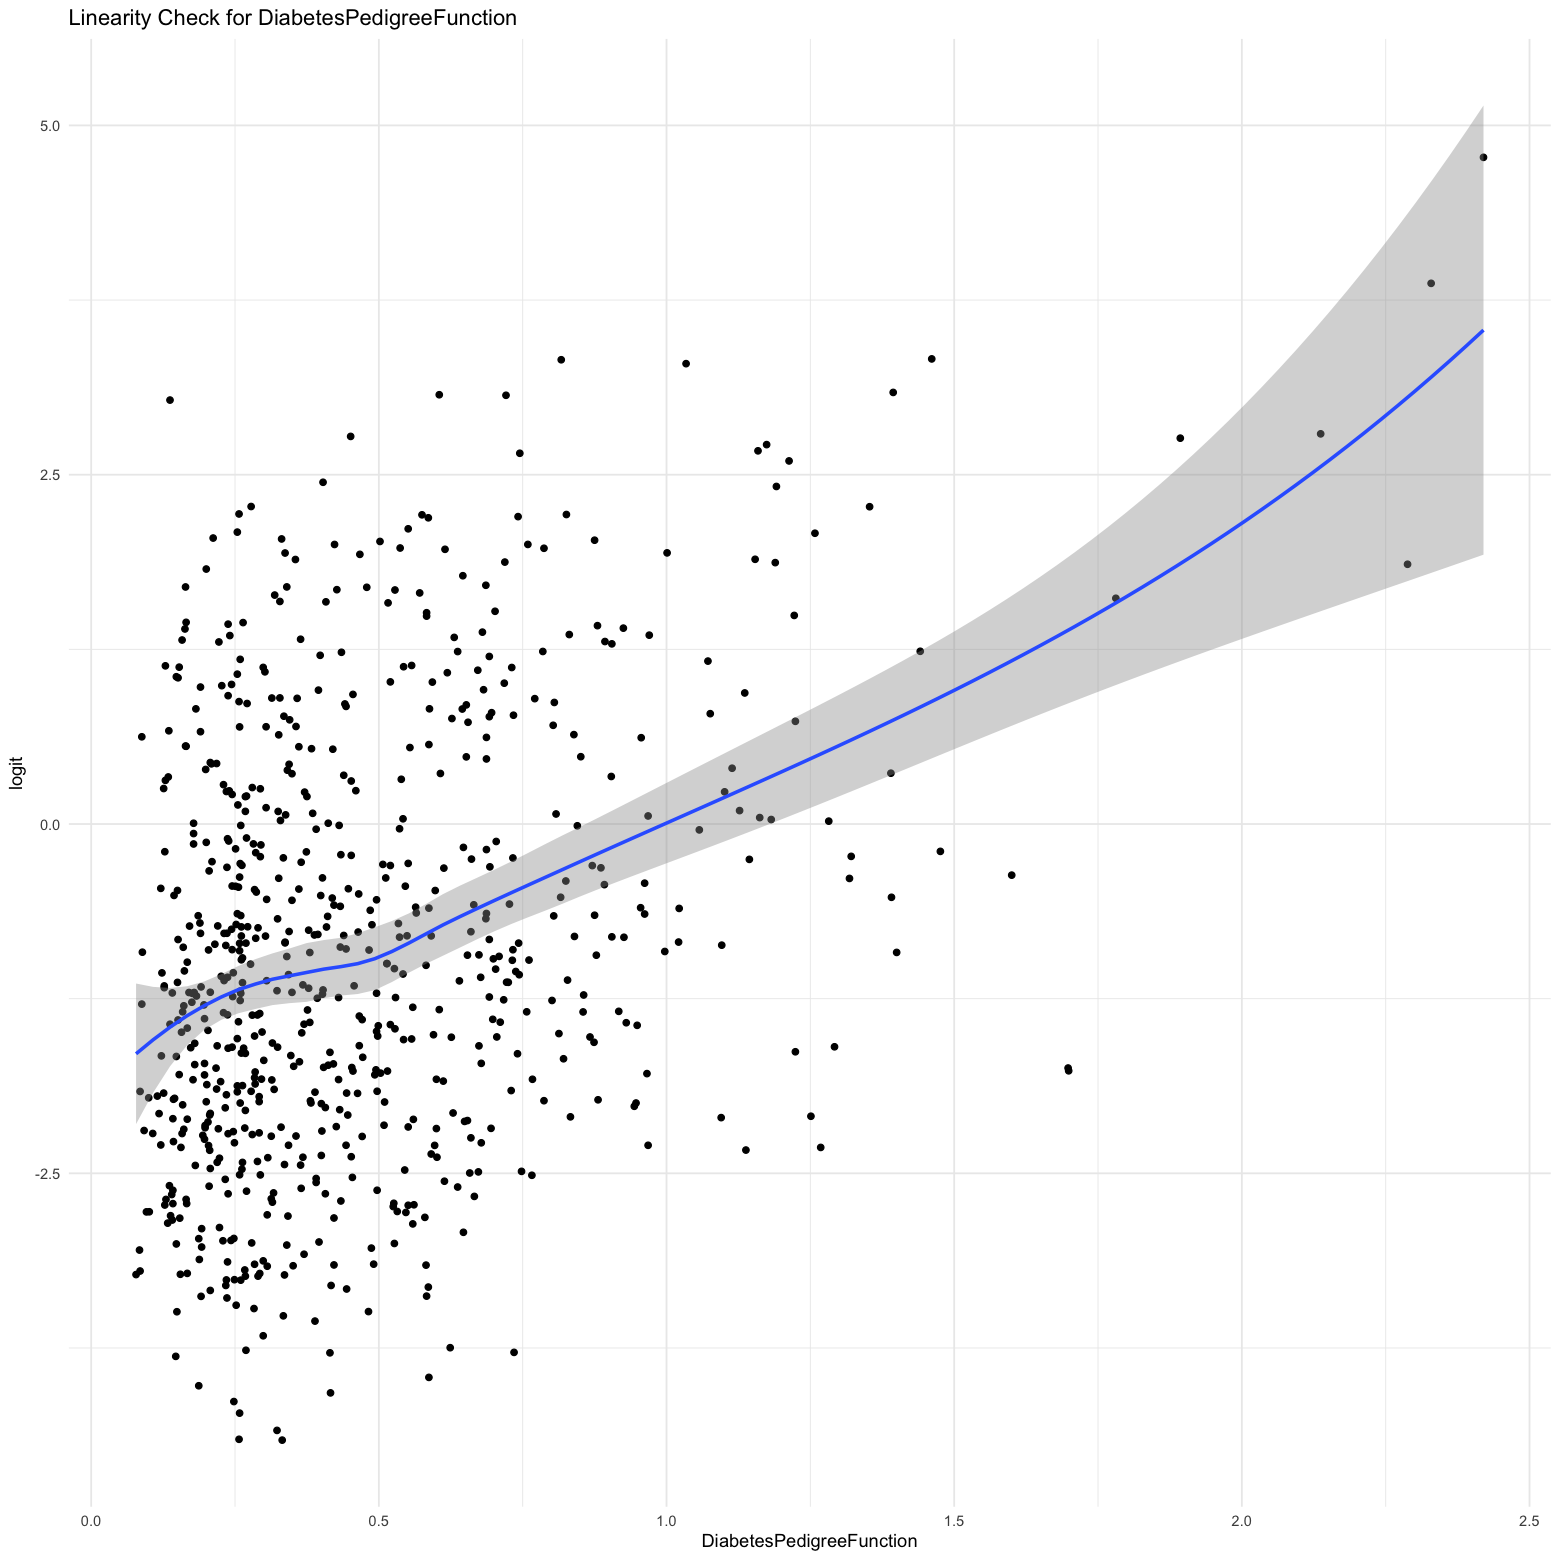

`geom_smooth()` using formula = 'y ~ x'


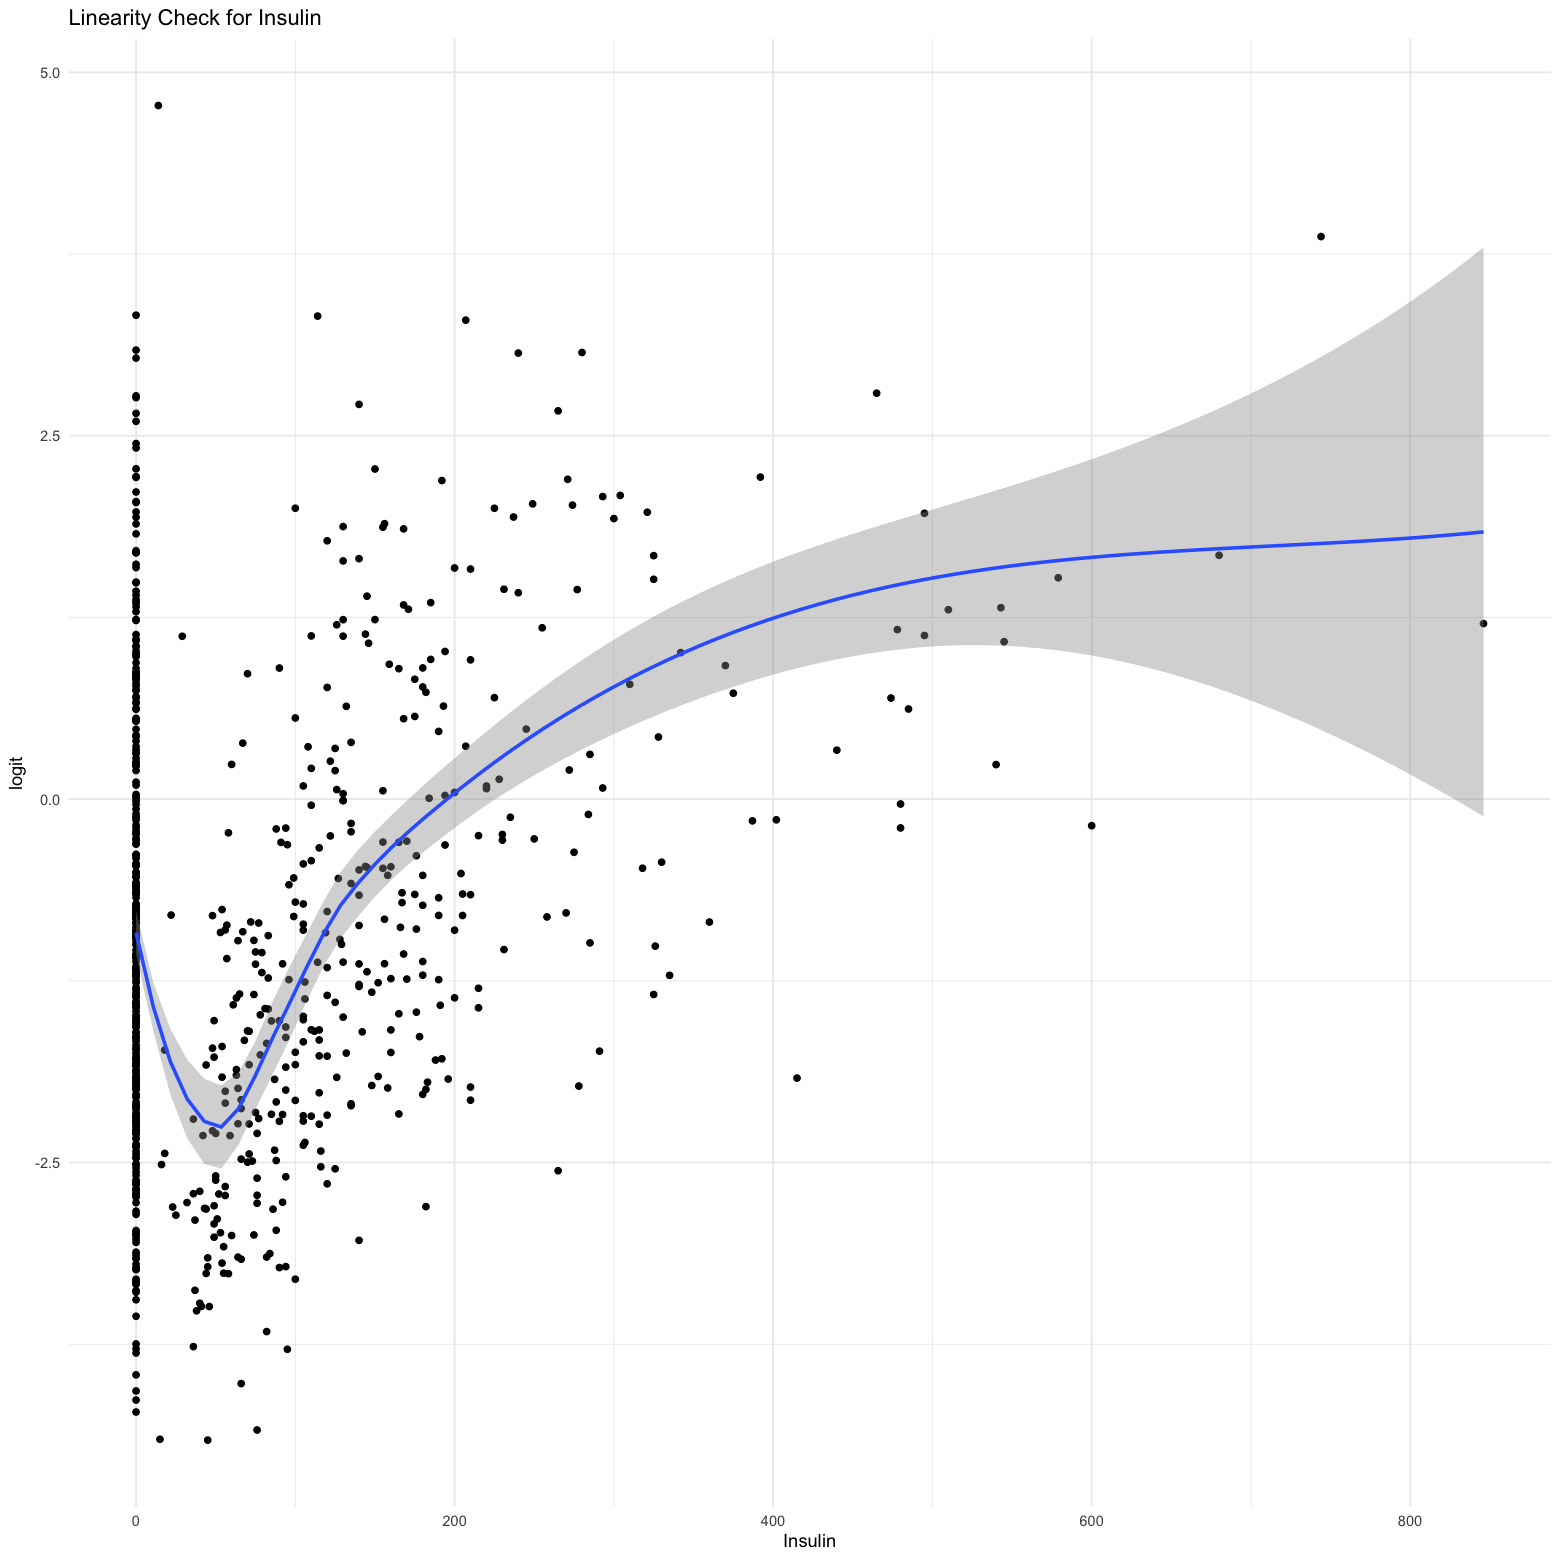

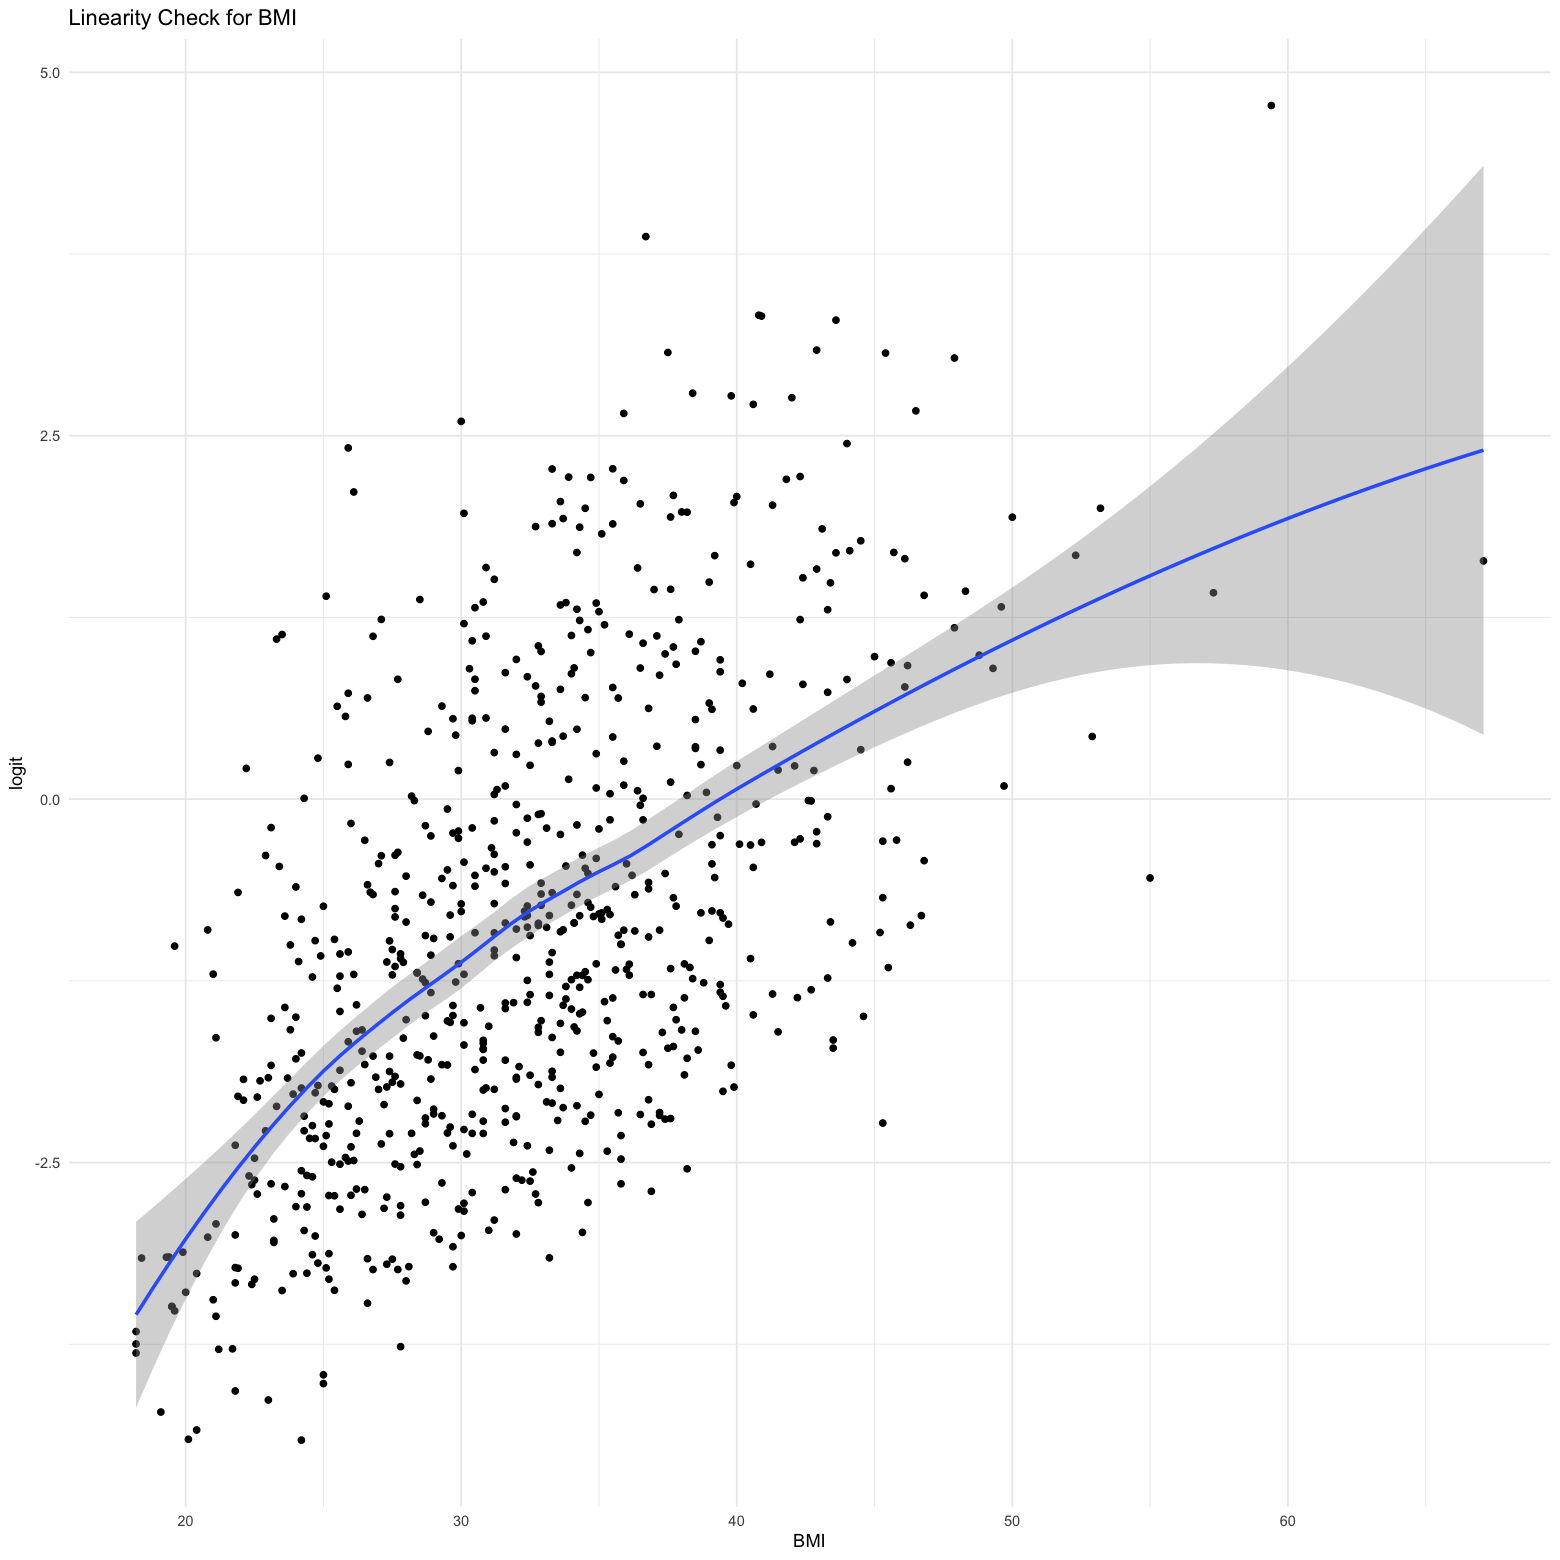

In [55]:
diabetes_data_clean$logit <- predict(best_model_add, type = "link")

# Create a scatter plot to check linearity for each predictor
# Age, Pregnancies, Glucose, BMI, DiabetesPedigreeFunction
ggplot(diabetes_data_clean, aes(x = Age, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for Age") + theme_minimal()
ggplot(diabetes_data_clean, aes(x = Pregnancies, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for Pregnancies") + theme_minimal()
ggplot(diabetes_data_clean, aes(x = Glucose, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for Glucose") + theme_minimal()
ggplot(diabetes_data_clean, aes(x = DiabetesPedigreeFunction, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for DiabetesPedigreeFunction") + theme_minimal()
ggplot(diabetes_data_clean, aes(x = Insulin, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for Insulin") + theme_minimal()
ggplot(diabetes_data_clean, aes(x = BMI, y = logit)) + geom_point() + geom_smooth(method = "loess") + 
  ggtitle("Linearity Check for BMI") + theme_minimal()

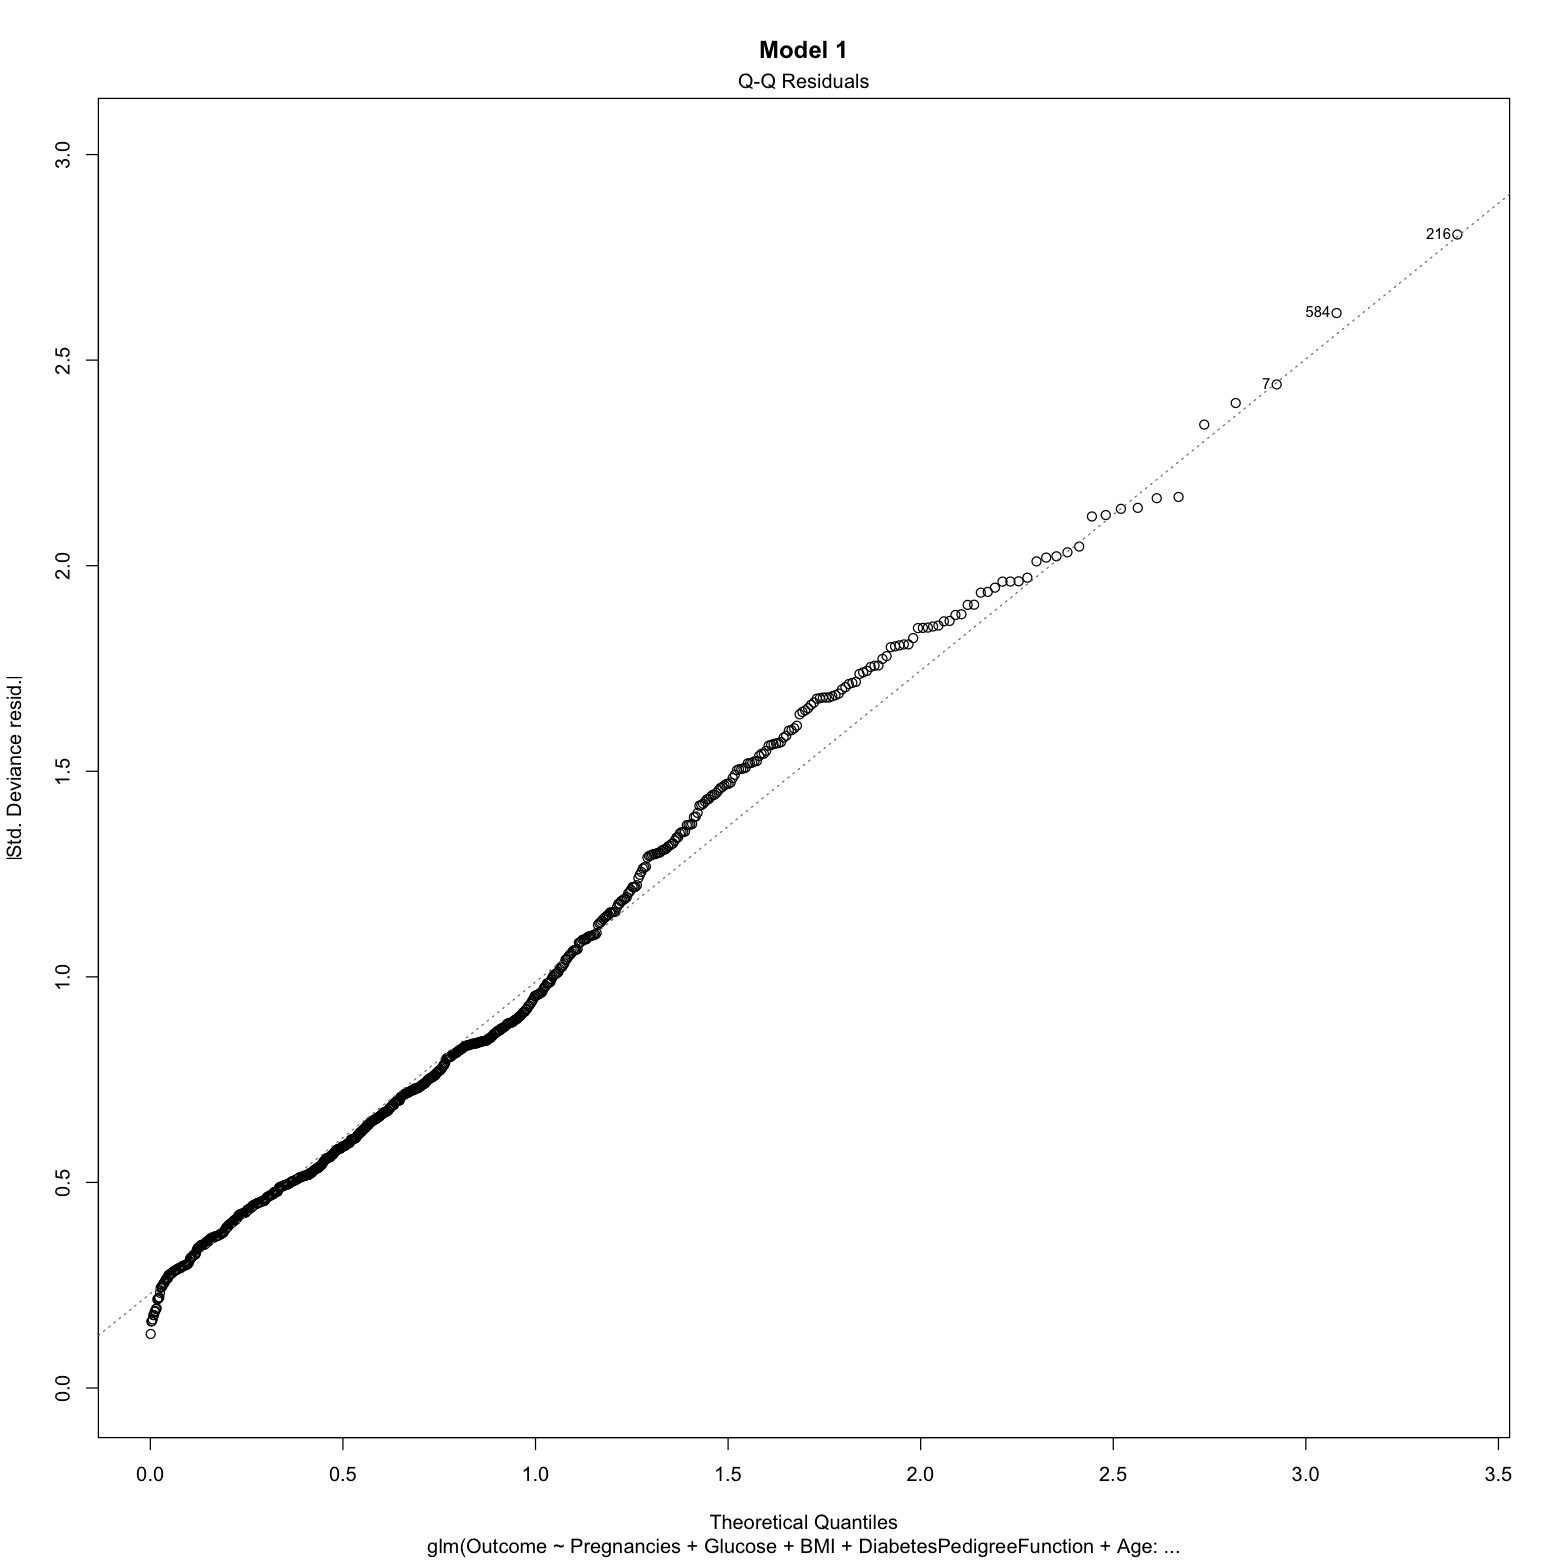

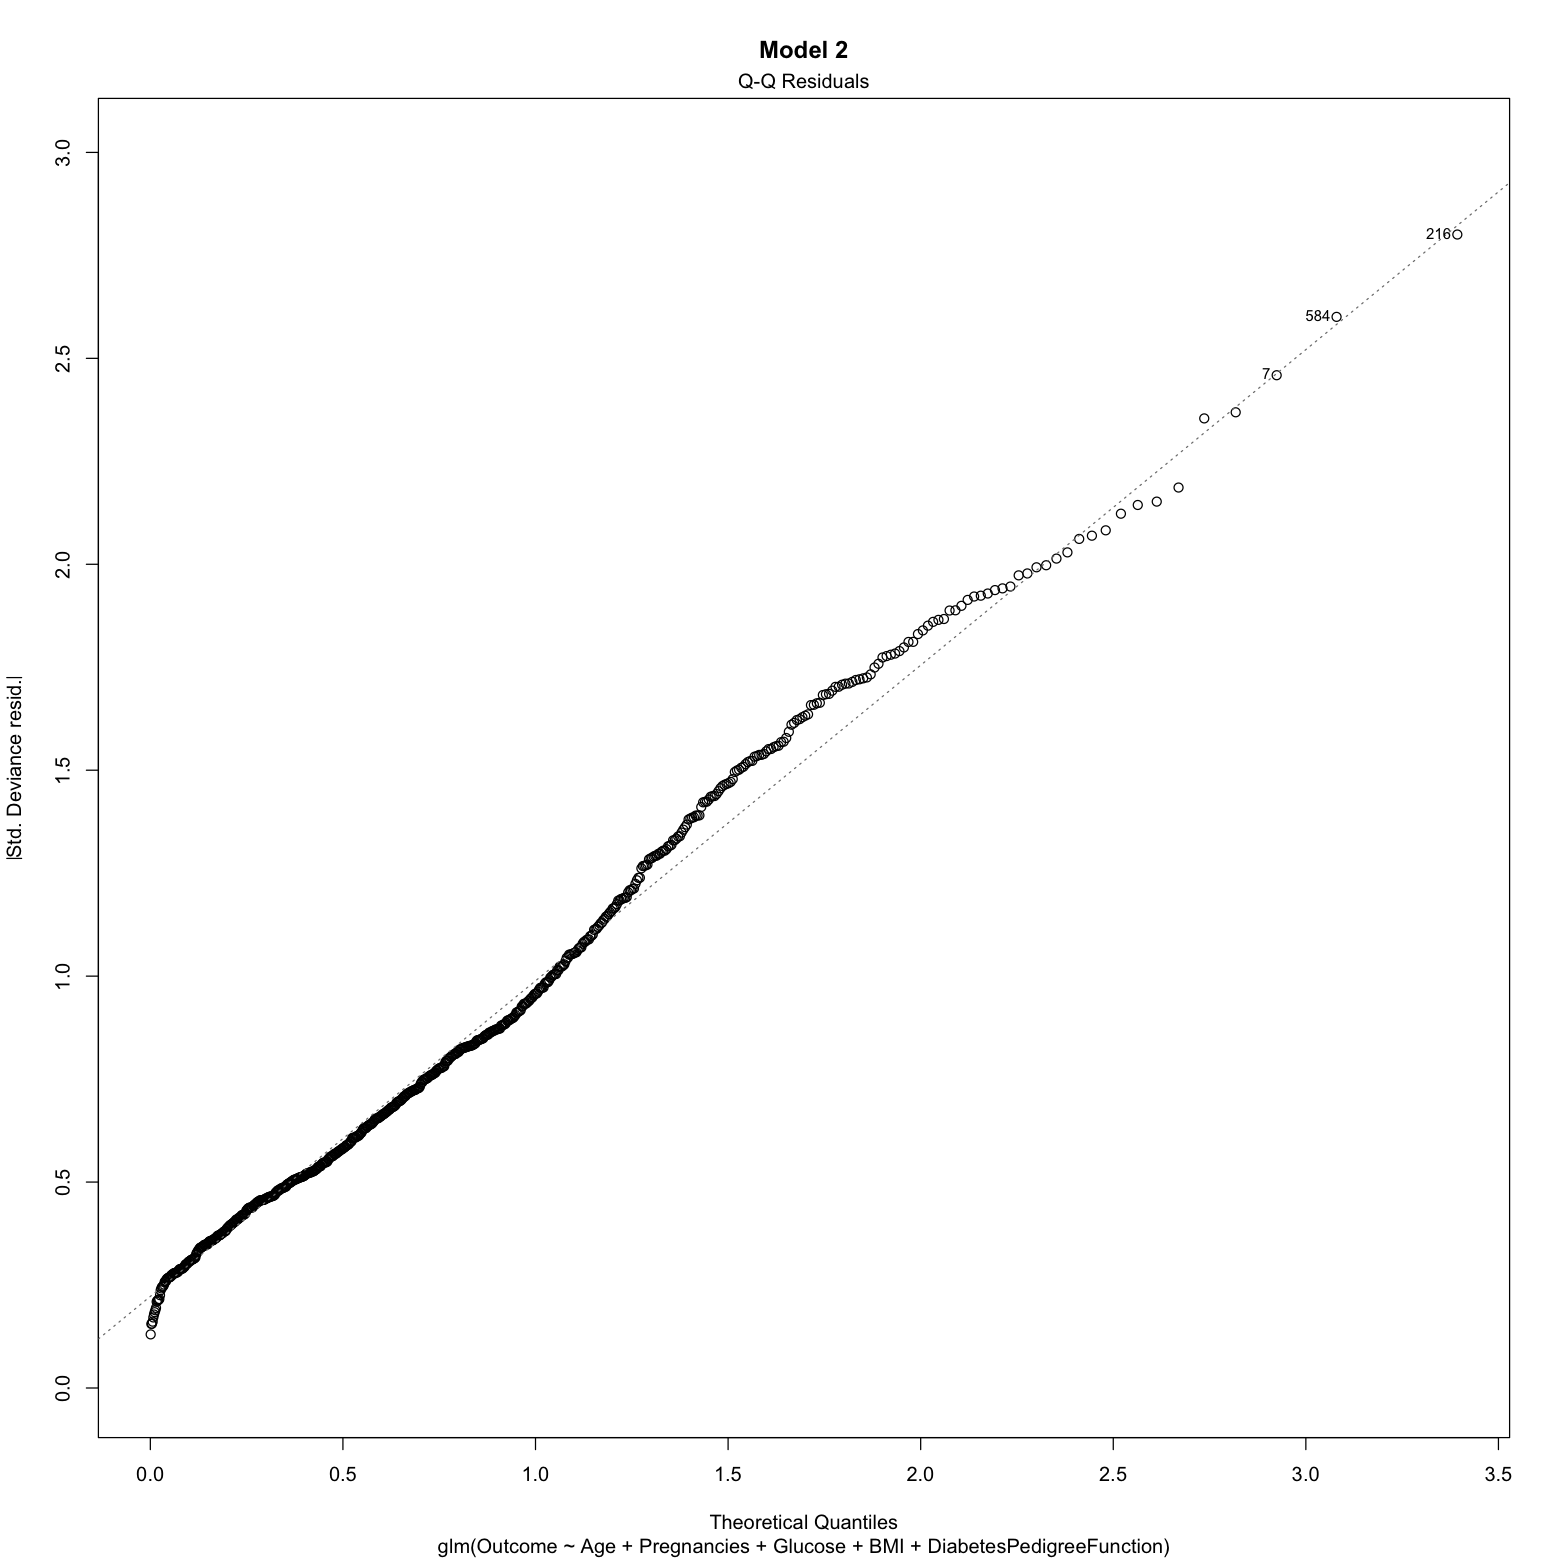

In [56]:
# Q-Q plot
plot(best_model, 2, main = "Model 1")
plot(best_model_add, 2, main = "Model 2")

#### Visualization of the results

In [57]:
# Generate predicted probabilities (fitted values)
diabetes_data_clean$predicted_prob <- predict(best_model, type = "response")
best_model_plot <- ggplot(diabetes_data_clean, aes(x = Age, y = predicted_prob)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "loess", color = "black") +
  theme(plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 16)) +
  scale_color_manual(values = c("blue", "orange"),
                     labels = c("No Diabetes", "Diabetes"),
                     name = "Diabetes Outcome") +
  labs(title = "Predicted Probability vs. Age",
       x = "Age", y = "Predicted Probability")

`geom_smooth()` using formula = 'y ~ x'


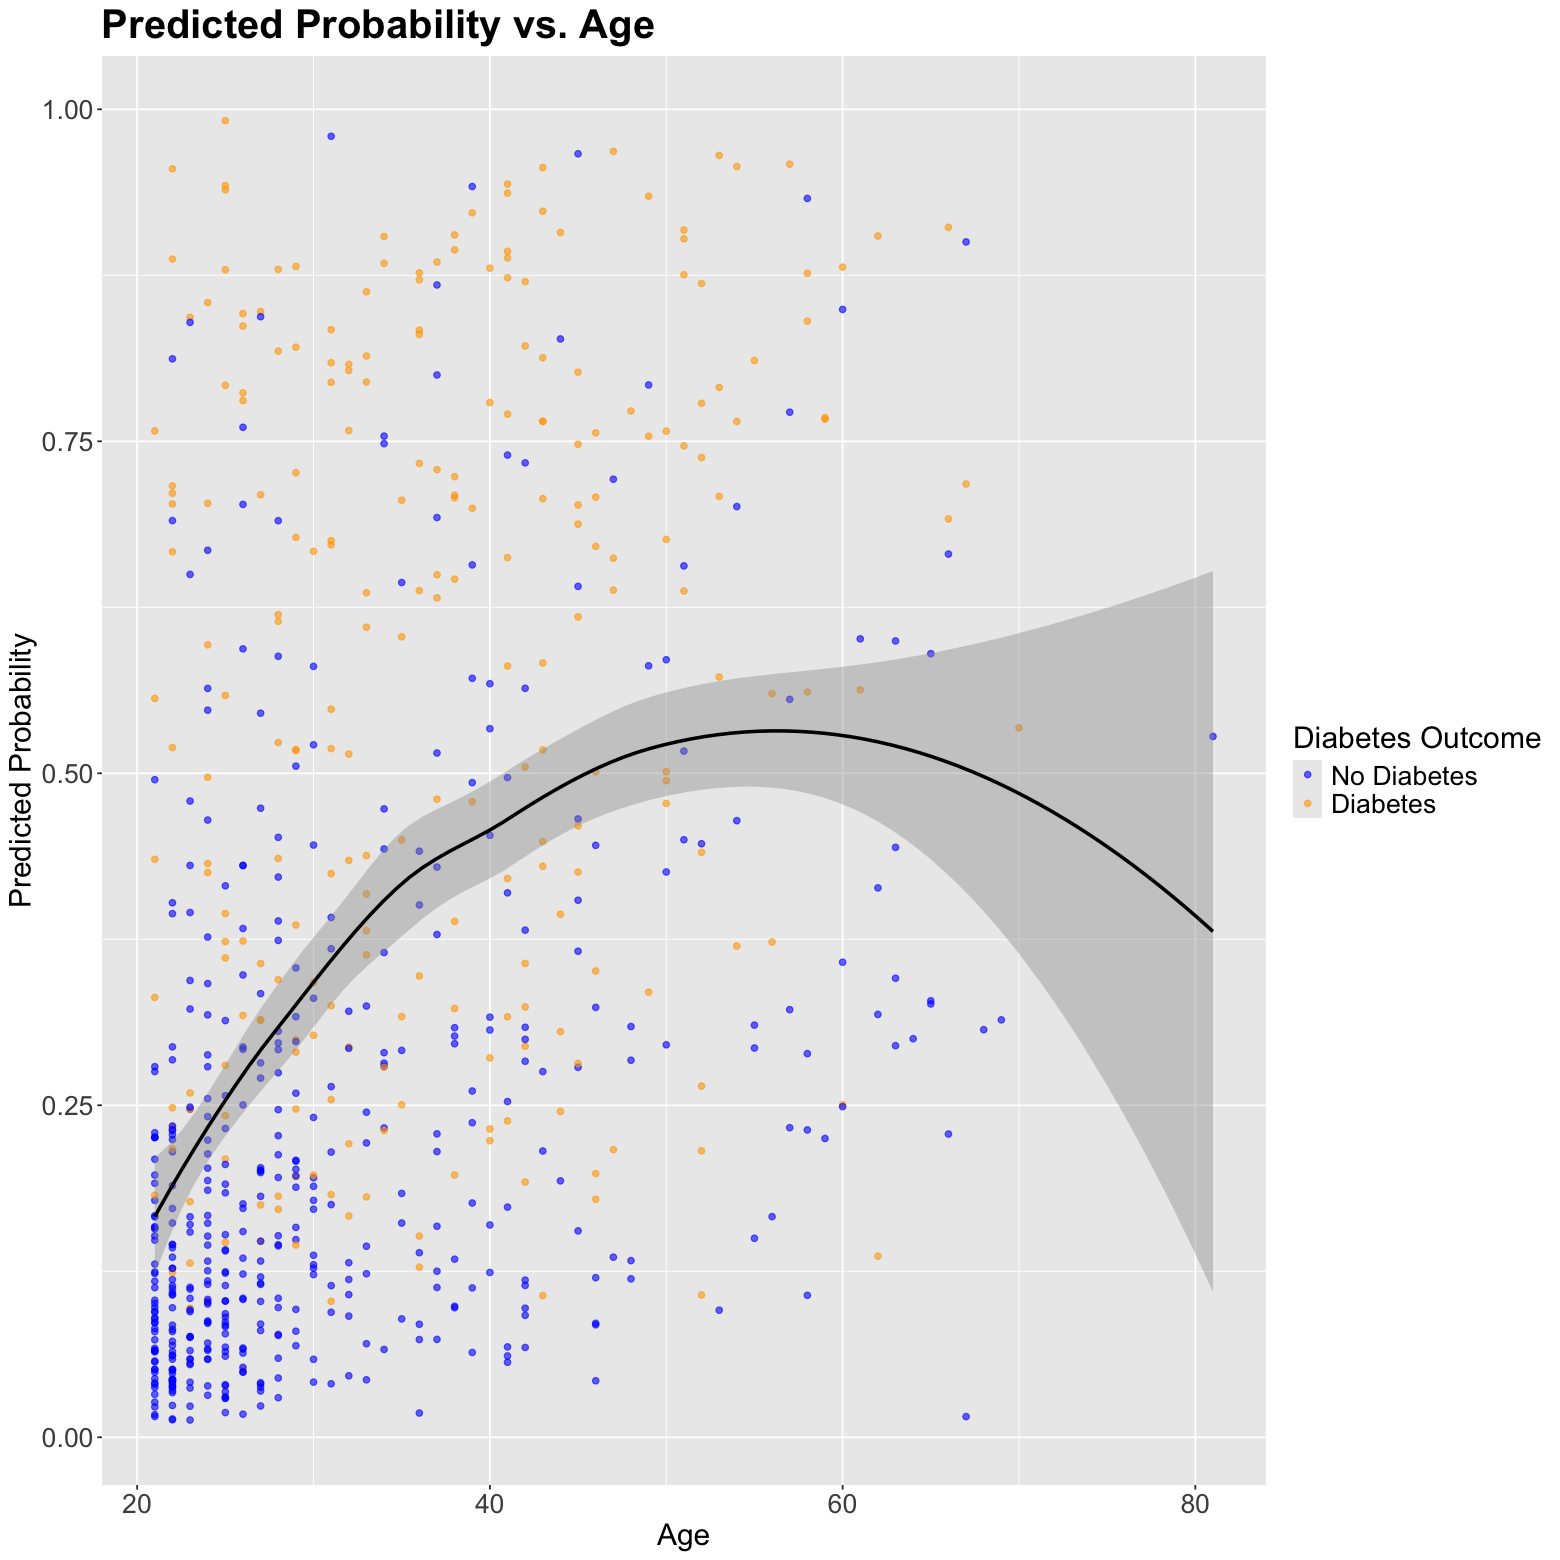

In [58]:
best_model_plot

### Interpretation of Results

Above I have visualized the predicted probability of having diabetes with age based on the interactive model, we can see that the probability of having diabetes increases sharply from around 1 in 5 at 20 years old to around 1 in 2 at 50 years old before plateauing/decreasing. We did expect that the probability of having diabetes would increase with age and this answers our questions about how diabetes incidence varies with age. We also saw that age interacts significantly with some other variables but they have very small coefficients/effects on the model (answering our second question). We also see that around 60 years old our model has very large confidence intervals and begins to decrease, which is likely not a real trend and instead arises from the structure of our data since we have very few older individuals with diabetes compared to without diabetes.